# IF3270 Pembelajaran Mesin | Tugas Besar - Feedforward Neural Network

Group Members:
- Maximilian Sulistiyo (13522061)
- Marvel Pangondian (13522075)
- Abdullah Mubarak (13522101)

In this project, we implement a custom built Feedforward Neural Network with no high-level libraries. The goal in this project is to be able to create a custom FFNN that is able to specify the type of activation function on each layer, the type of loss function, and how many neurons in each layer. We will also compare our algorithm with other built in algorithm (the sklearn MLP)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from ann import NeuralNetwork, one_hot, get_accuracy
from dense_layer import DenseLayer
from activations import *
from visualizer import visualize_ann
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from activations import tanh, sigmoid, relu

## Import Dataset

### Fetch dataset

In [2]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

### Copy dataset and normalize

In [5]:
X_original = X.copy()
X_original = X_original/255.0
y_original = y.copy()
y_original = y_original.astype(int)

### Split dataset

In [ ]:
X_train = X_original[:60000]
y_train = y_original[:60000]

X_test = X_original[60000:]
y_test = y_original[60000:]

In [7]:
y_train_oh = one_hot(y_train)
y_test_oh = one_hot(y_test)

## Example of Training Model

In [8]:
model = NeuralNetwork('binary_cross_entropy')
model.add_layer(DenseLayer(output_size=128,activation=relu, init="Xavier"))
model.add_layer(DenseLayer(output_size=64, activation=relu, init="Xavier"))
model.add_layer(DenseLayer(output_size=10, activation=sigmoid, init="Xavier"))

history = model.train(
    X_train,
    y_train,
    epochs=10,
    batch_size=64,
    learning_rate=0.05,
    isOne_hot=True,
    verbose=1,
    validation_data=(X_test, y_test)
)

[=================================================>] 100%
Epoch 1/10 - 2.54s - loss: 0.2401 - accuracy: 0.8138 - val_loss: 0.1490 - val_accuracy: 0.8152
[=================================================>] 100%
Epoch 2/10 - 2.65s - loss: 0.1188 - accuracy: 0.8686 - val_loss: 0.0997 - val_accuracy: 0.8680
[=================================================>] 100%
Epoch 3/10 - 2.72s - loss: 0.0885 - accuracy: 0.8913 - val_loss: 0.0811 - val_accuracy: 0.8918
[=================================================>] 100%
Epoch 4/10 - 2.44s - loss: 0.0752 - accuracy: 0.9012 - val_loss: 0.0715 - val_accuracy: 0.9003
[=================================================>] 100%
Epoch 5/10 - 2.65s - loss: 0.0674 - accuracy: 0.9077 - val_loss: 0.0656 - val_accuracy: 0.9068
[=================================================>] 100%
Epoch 6/10 - 2.60s - loss: 0.0619 - accuracy: 0.9136 - val_loss: 0.0607 - val_accuracy: 0.9126
[=================================================>] 100%
Epoch 7/10 - 2.59s - los

In [9]:
predictions = model.predict(X_test)
pred_classes = np.argmax(predictions, axis=1)
accuracy = accuracy_score(pred_classes, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9296


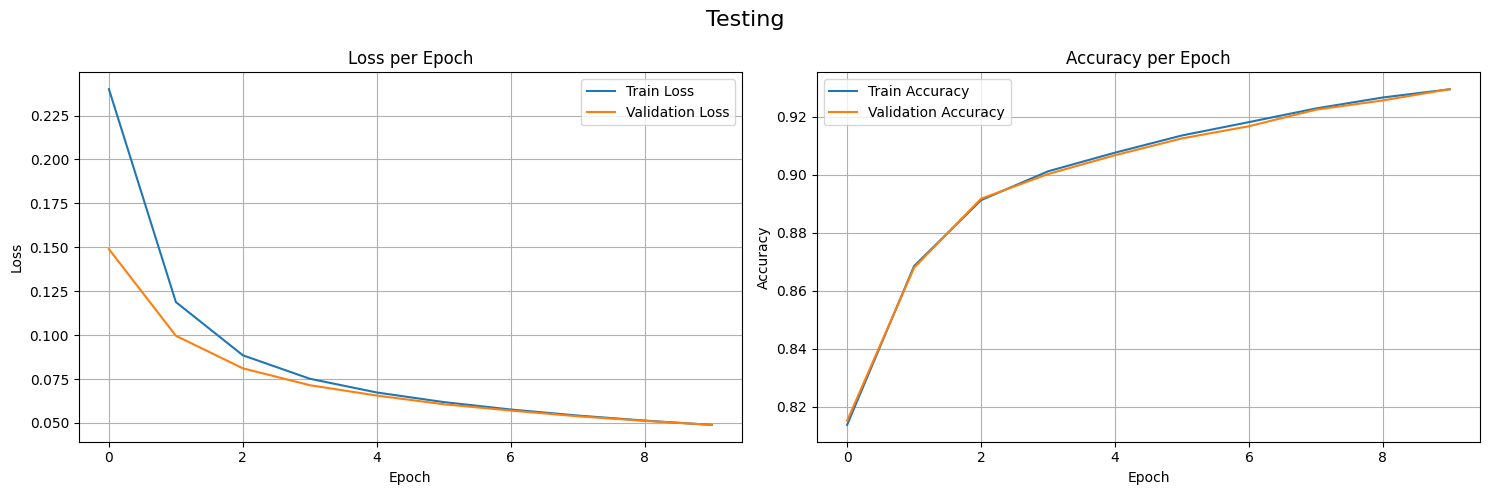

In [12]:
model.plot_training('Testing')

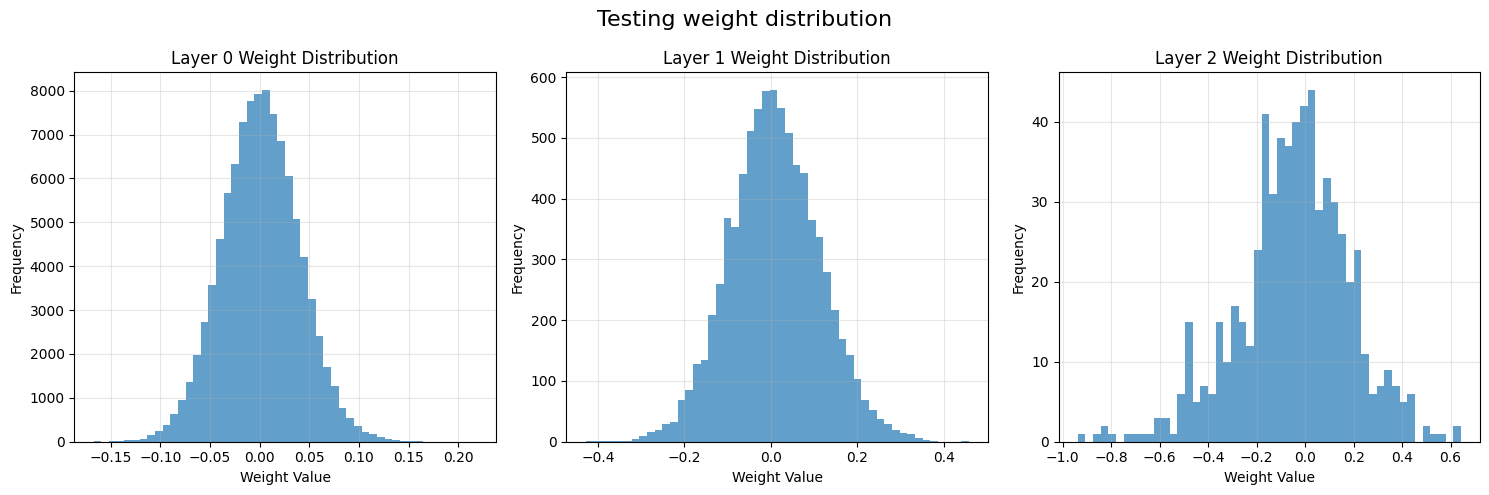

In [15]:
model.plot_weight_distribution(title='Testing weight distribution')

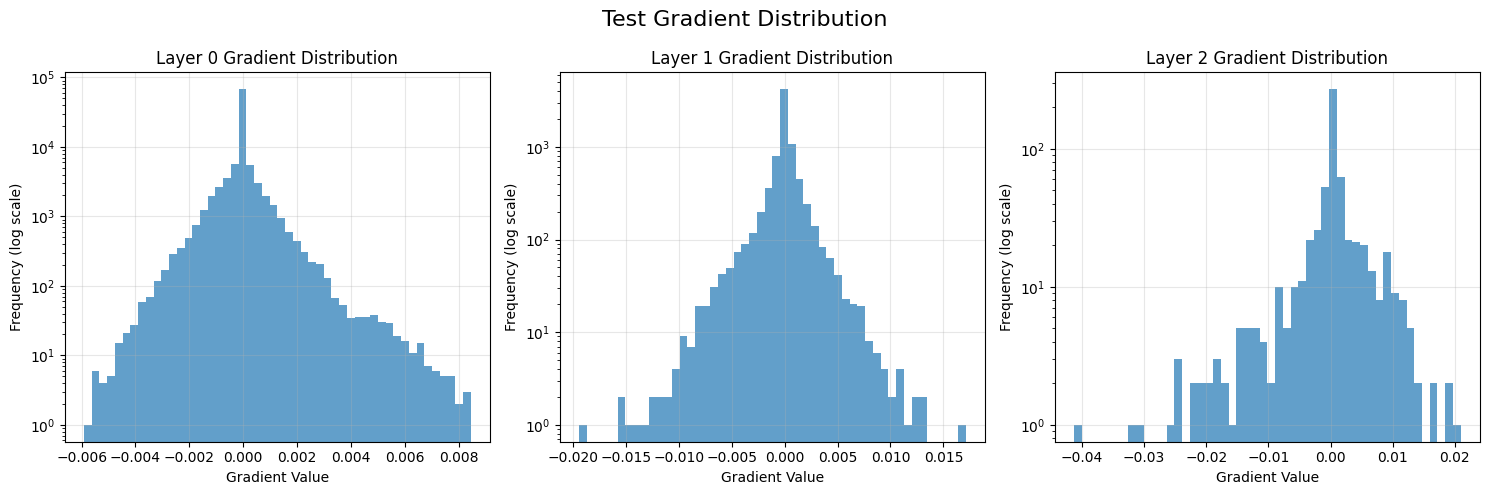

In [17]:
model.plot_gradient_distribution(title='Test Gradient Distribution')

### Example of visualizing trained model

In [18]:
model.visualize(output_dir='../ann_visualizer/output/', filename='testing')

## Analysis

### 1. Effect of depth (Number of layers) and Width (Number of neurons per layer)

#### Effect of Width (number of neurons)
- Number of hidden layers : 2
- Test 1 : 32 neurons per layer
- Test 2 : 64 neurons per layer
- Test 3 : 128 neurons per layer

##### Test 1 - 32 neurons per layer

In [32]:
model_test_1_effect_of_width = NeuralNetwork('categorical_cross_entropy')
model_test_1_effect_of_width.add_layer(DenseLayer(output_size=32, seed=40, activation=relu, init="Xavier"))
model_test_1_effect_of_width.add_layer(DenseLayer(output_size=32, seed=41, activation=relu, init="Xavier"))
model_test_1_effect_of_width.add_layer(DenseLayer(output_size=10, seed=42, activation=softmax, init="Xavier"))

history_test_1_effect_of_width = model_test_1_effect_of_width.train(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    learning_rate=0.05,
    isOne_hot=True,
    verbose=1,
    validation_data=(X_test, y_test)
)

[=================================================>] 100%
Epoch 1/50 - 1.74s - loss: 0.5213 - accuracy: 0.9161 - val_loss: 0.3034 - val_accuracy: 0.9138
[=================================================>] 100%
Epoch 2/50 - 1.71s - loss: 0.2572 - accuracy: 0.9395 - val_loss: 0.2225 - val_accuracy: 0.9380
[=================================================>] 100%
Epoch 3/50 - 1.74s - loss: 0.2022 - accuracy: 0.9493 - val_loss: 0.1909 - val_accuracy: 0.9440
[=================================================>] 100%
Epoch 4/50 - 1.79s - loss: 0.1707 - accuracy: 0.9555 - val_loss: 0.1748 - val_accuracy: 0.9495
[=================================================>] 100%
Epoch 5/50 - 1.77s - loss: 0.1486 - accuracy: 0.9611 - val_loss: 0.1552 - val_accuracy: 0.9551
[=================================================>] 100%
Epoch 6/50 - 1.77s - loss: 0.1325 - accuracy: 0.9642 - val_loss: 0.1444 - val_accuracy: 0.9577
[=================================================>] 100%
Epoch 7/50 - 1.75s - los

In [33]:
predictions_test_1_effect_of_width = model_test_1_effect_of_width.predict(X_test)
pred_classes_test_1_effect_of_width = np.argmax(predictions_test_1_effect_of_width, axis=1)
accuracy_test_1_effect_of_width = accuracy_score(pred_classes_test_1_effect_of_width, y_test)
print("Test Accuracy:", accuracy_test_1_effect_of_width)

Test Accuracy: 0.9667


##### Test 2 - 64 neurons per layer

In [34]:
model_test_2_effect_of_width = NeuralNetwork('categorical_cross_entropy')
model_test_2_effect_of_width.add_layer(DenseLayer(output_size=64, seed=40, activation=relu, init="Xavier"))
model_test_2_effect_of_width.add_layer(DenseLayer(output_size=64, seed=41, activation=relu, init="Xavier"))
model_test_2_effect_of_width.add_layer(DenseLayer(output_size=10, seed=42, activation=softmax, init="Xavier"))

history_test_2_effect_of_width = model_test_2_effect_of_width.train(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    learning_rate=0.05,
    isOne_hot=True,
    verbose=1,
    validation_data=(X_test, y_test)
)

[=================================================>] 100%
Epoch 1/50 - 2.17s - loss: 0.4902 - accuracy: 0.9240 - val_loss: 0.2762 - val_accuracy: 0.9208
[=================================================>] 100%
Epoch 2/50 - 2.18s - loss: 0.2278 - accuracy: 0.9464 - val_loss: 0.2021 - val_accuracy: 0.9426
[=================================================>] 100%
Epoch 3/50 - 2.17s - loss: 0.1754 - accuracy: 0.9553 - val_loss: 0.1706 - val_accuracy: 0.9519
[=================================================>] 100%
Epoch 4/50 - 2.31s - loss: 0.1461 - accuracy: 0.9642 - val_loss: 0.1475 - val_accuracy: 0.9583
[=================================================>] 100%
Epoch 5/50 - 2.22s - loss: 0.1249 - accuracy: 0.9677 - val_loss: 0.1340 - val_accuracy: 0.9608
[=================================================>] 100%
Epoch 6/50 - 2.55s - loss: 0.1087 - accuracy: 0.9708 - val_loss: 0.1268 - val_accuracy: 0.9621
[=================================================>] 100%
Epoch 7/50 - 2.81s - los

In [35]:
predictions_test_2_effect_of_width = model_test_2_effect_of_width.predict(X_test)
pred_classes_test_2_effect_of_width = np.argmax(predictions_test_2_effect_of_width, axis=1)
accuracy_test_2_effect_of_width = accuracy_score(pred_classes_test_2_effect_of_width, y_test)
print("Test Accuracy:", accuracy_test_2_effect_of_width)

Test Accuracy: 0.9757


##### Test 3 - 128 neurons per layer

In [36]:
model_test_3_effect_of_width = NeuralNetwork('categorical_cross_entropy')
model_test_3_effect_of_width.add_layer(DenseLayer(output_size=128, seed=40, activation=relu, init="Xavier"))
model_test_3_effect_of_width.add_layer(DenseLayer(output_size=128, seed=41, activation=relu, init="Xavier"))
model_test_3_effect_of_width.add_layer(DenseLayer(output_size=10, seed=42, activation=softmax, init="Xavier"))

history_test_3_effect_of_width = model_test_3_effect_of_width.train(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    learning_rate=0.05,
    isOne_hot=True,
    verbose=1,
    validation_data=(X_test, y_test)
)

[=================================================>] 100%
Epoch 1/50 - 5.21s - loss: 0.4771 - accuracy: 0.9255 - val_loss: 0.2757 - val_accuracy: 0.9231
[=================================================>] 100%
Epoch 2/50 - 5.40s - loss: 0.2228 - accuracy: 0.9492 - val_loss: 0.1924 - val_accuracy: 0.9463
[=================================================>] 100%
Epoch 3/50 - 3.92s - loss: 0.1684 - accuracy: 0.9599 - val_loss: 0.1555 - val_accuracy: 0.9553
[=================================================>] 100%
Epoch 4/50 - 3.63s - loss: 0.1358 - accuracy: 0.9671 - val_loss: 0.1353 - val_accuracy: 0.9607
[=================================================>] 100%
Epoch 5/50 - 4.69s - loss: 0.1131 - accuracy: 0.9705 - val_loss: 0.1217 - val_accuracy: 0.9637
[=================================================>] 100%
Epoch 6/50 - 3.80s - loss: 0.0961 - accuracy: 0.9772 - val_loss: 0.1071 - val_accuracy: 0.9685
[=================================================>] 100%
Epoch 7/50 - 3.89s - los

In [37]:
predictions_test_3_effect_of_width = model_test_3_effect_of_width.predict(X_test)
pred_classes_test_3_effect_of_width = np.argmax(predictions_test_3_effect_of_width, axis=1)
accuracy_test_3_effect_of_width = accuracy_score(pred_classes_test_3_effect_of_width, y_test)
print("Test Accuracy:", accuracy_test_3_effect_of_width)

Test Accuracy: 0.9802


##### Effect of width - Training comparison

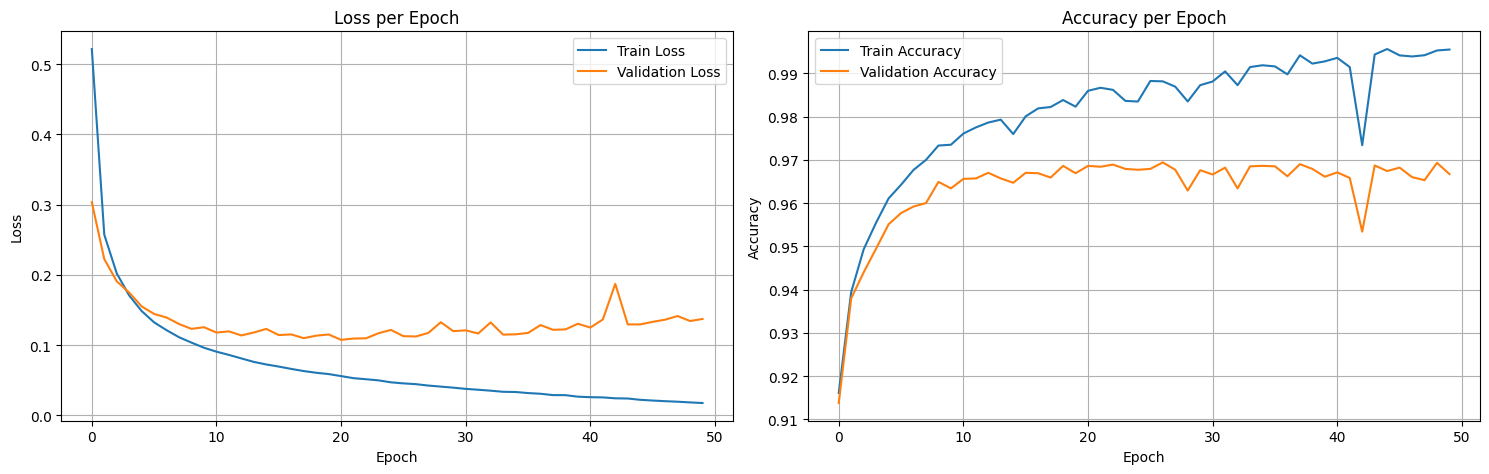

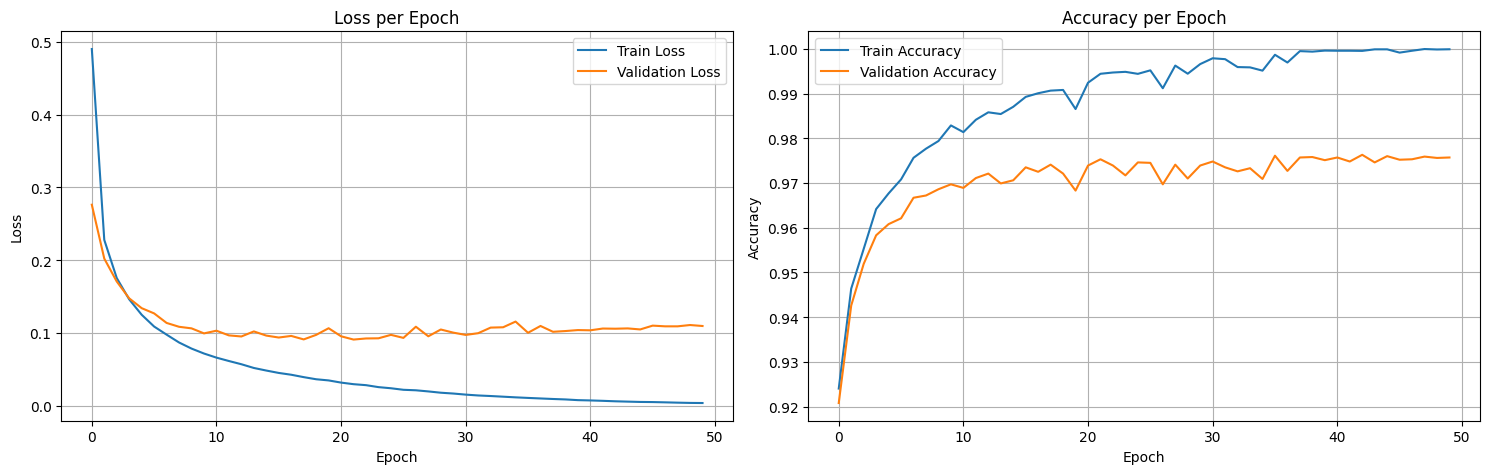

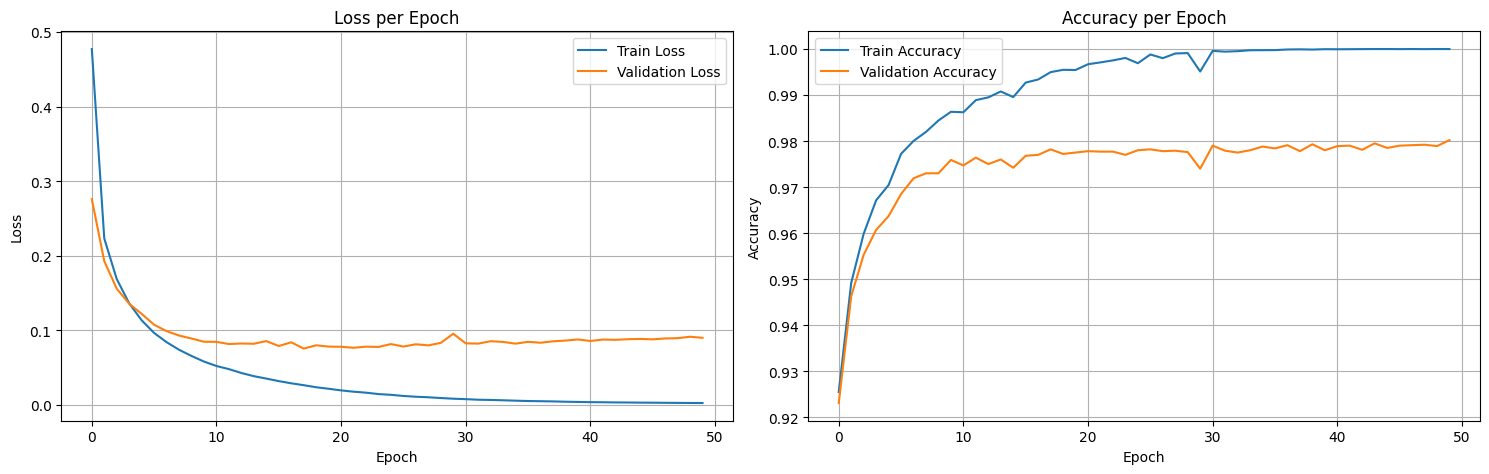

In [38]:
model_test_1_effect_of_width.plot_training()
model_test_2_effect_of_width.plot_training()
model_test_3_effect_of_width.plot_training()

##### Effect of width - Weight Distribution Comparison

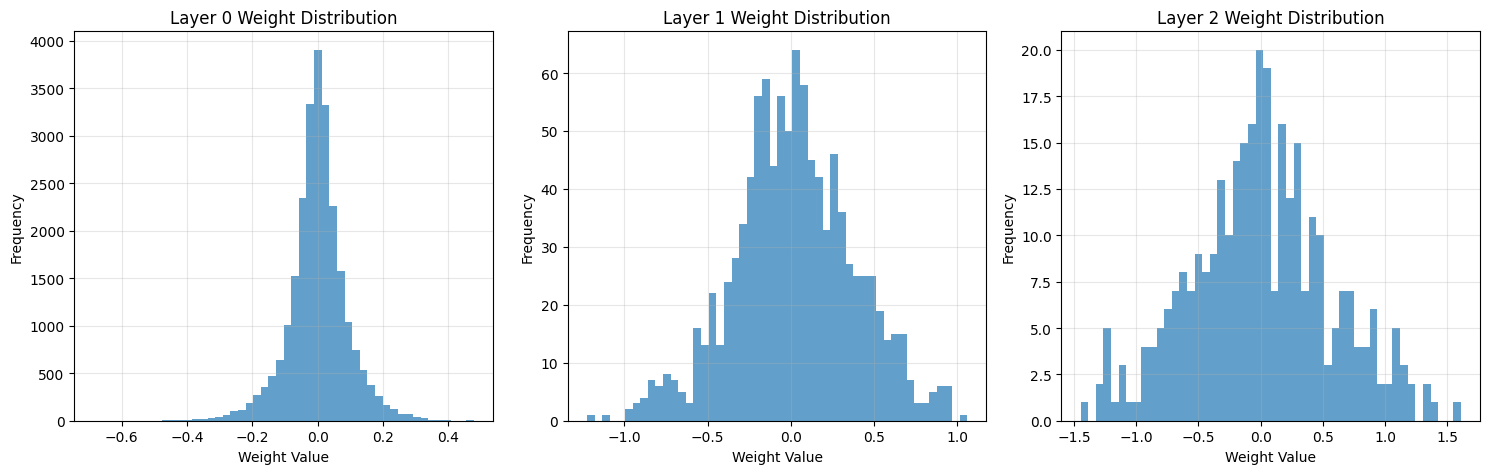

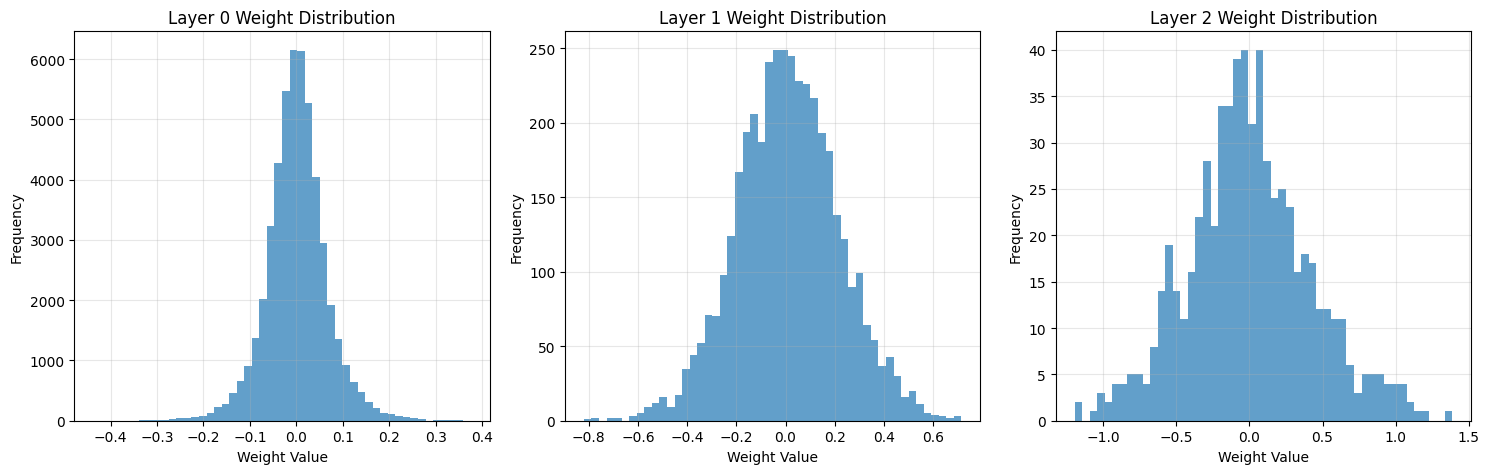

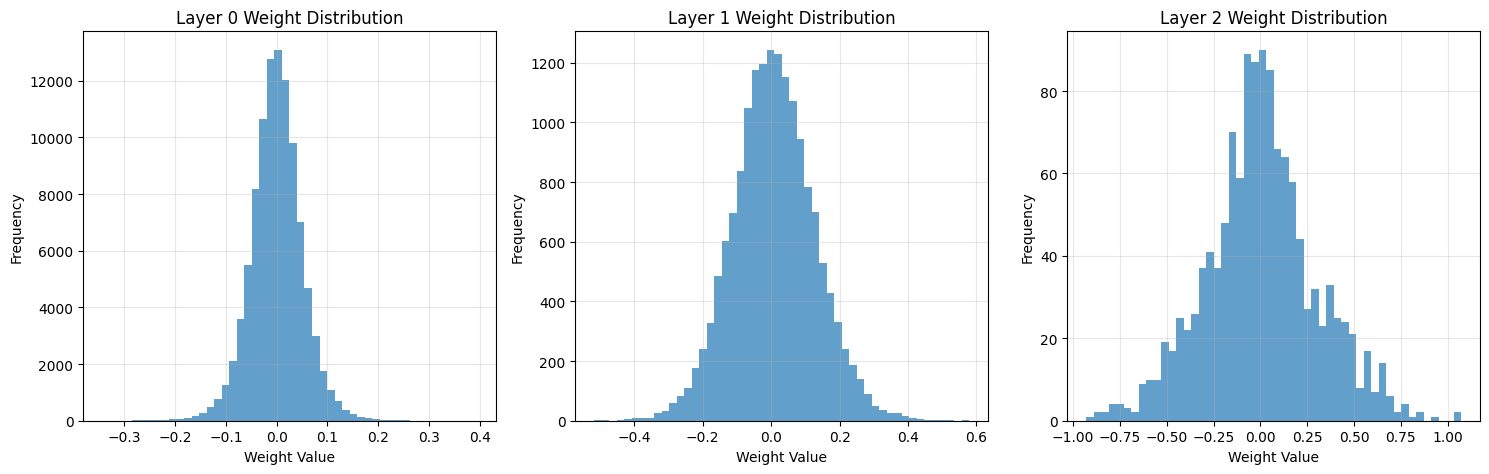

In [39]:
model_test_1_effect_of_width.plot_weight_distribution()
model_test_2_effect_of_width.plot_weight_distribution()
model_test_3_effect_of_width.plot_weight_distribution()

##### Effect of width - Gradient Distribution Comparison

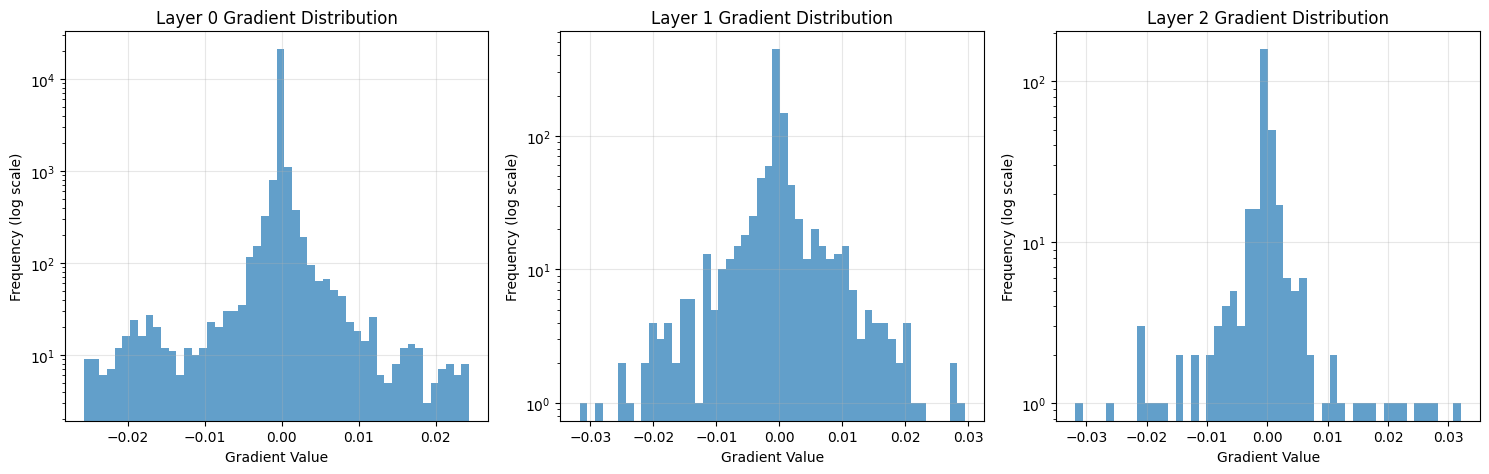

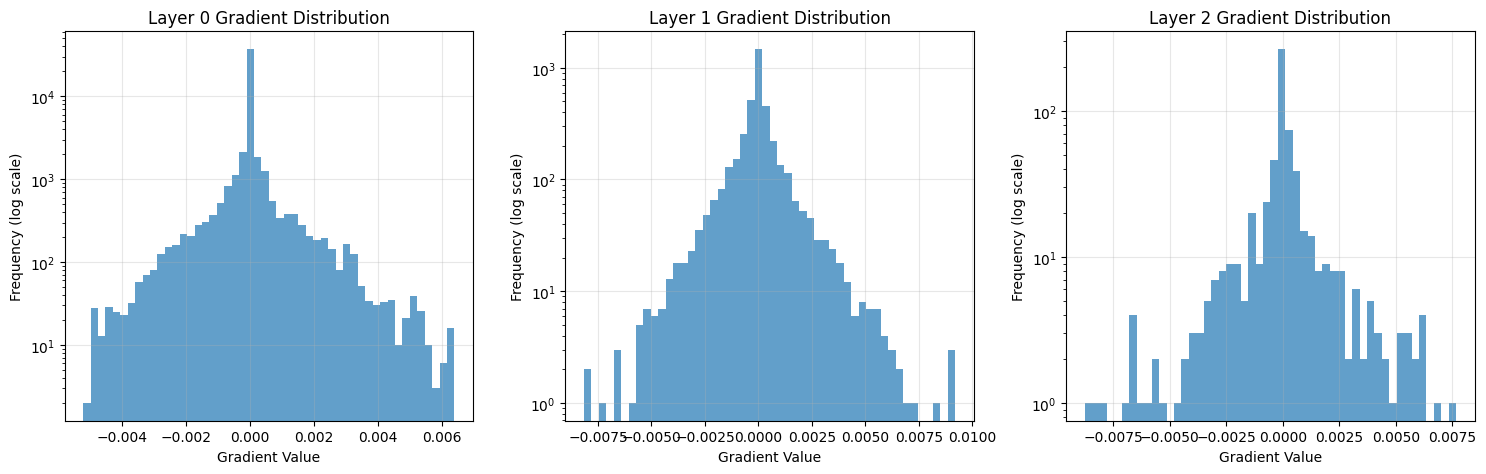

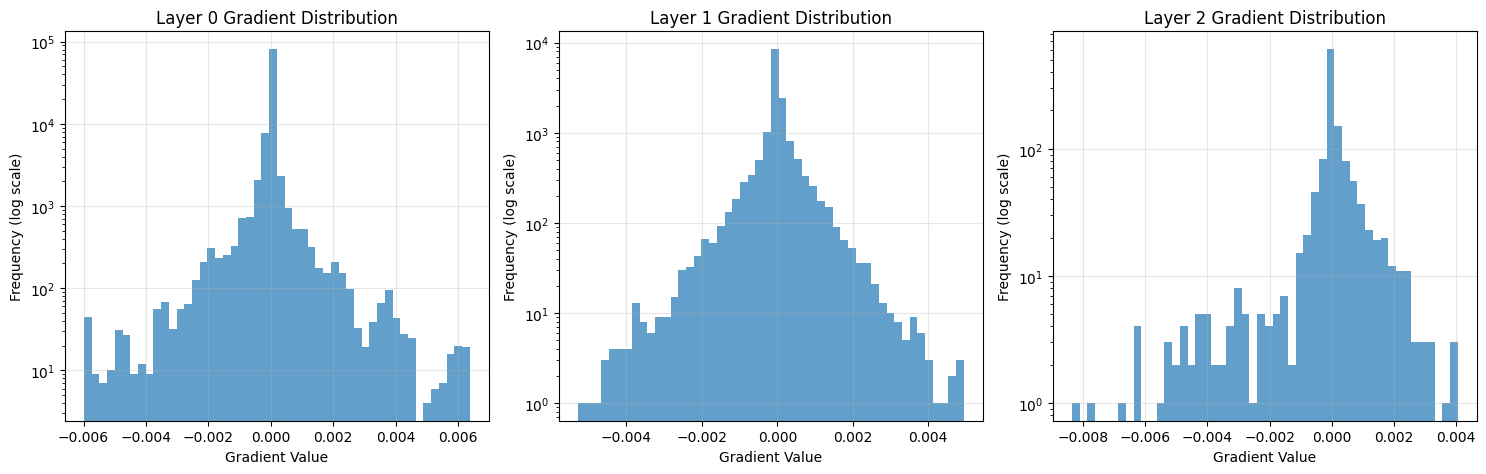

In [40]:
model_test_1_effect_of_width.plot_gradient_distribution()
model_test_2_effect_of_width.plot_gradient_distribution()
model_test_3_effect_of_width.plot_gradient_distribution()

##### Conclusion - Affect of Width (number of neurons)

Based on our experiments across models with varying widths (number of neurons per layer), wider networks demonstrated better performance, achieving higher validation accuracy and more stable learning curves. The visualizations revealed four key findings: 
1. Larger networks learn better: Networks with more neurons reached higher accuracy on both training and test datasets. They also learned faster and more smoothly.
2. Improved predictions: Networks with more neurons delivered better predictions, with the third model (the widest network) achieving the highest accuracy at 98.02%.
3. Smoother loss curves: Wider networks exhibited lower final loss values and smoother loss curves, while narrower networks showed more fluctuations.
4. Effect on weight distribution: Wider networks had weight distributions that were more centered around zero.

#### Effect of Depth (number of layers)
- Number of neurons per layer : 64
- Test 1 : 1 hidden layer
- Test 2 : 3 hidden layers
- Test 3 : 5 hidden layers

##### Test 1 - 1 hidden layer

In [41]:
model_test_1_effect_of_depth = NeuralNetwork('categorical_cross_entropy')
model_test_1_effect_of_depth.add_layer(DenseLayer(output_size=64, seed=40, activation=relu, init="Xavier"))
model_test_1_effect_of_depth.add_layer(DenseLayer(output_size=10, seed=42, activation=softmax, init="Xavier"))

history_test_1_effect_of_depth = model_test_1_effect_of_depth.train(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    learning_rate=0.05,
    isOne_hot=True,
    verbose=1,
    validation_data=(X_test, y_test)
)

[=================================================>] 100%
Epoch 1/50 - 1.93s - loss: 0.5115 - accuracy: 0.9124 - val_loss: 0.3233 - val_accuracy: 0.9097
[=================================================>] 100%
Epoch 2/50 - 1.94s - loss: 0.2824 - accuracy: 0.9299 - val_loss: 0.2604 - val_accuracy: 0.9289
[=================================================>] 100%
Epoch 3/50 - 1.93s - loss: 0.2330 - accuracy: 0.9413 - val_loss: 0.2233 - val_accuracy: 0.9401
[=================================================>] 100%
Epoch 4/50 - 1.93s - loss: 0.1984 - accuracy: 0.9505 - val_loss: 0.1958 - val_accuracy: 0.9479
[=================================================>] 100%
Epoch 5/50 - 2.01s - loss: 0.1725 - accuracy: 0.9545 - val_loss: 0.1789 - val_accuracy: 0.9519
[=================================================>] 100%
Epoch 6/50 - 2.00s - loss: 0.1532 - accuracy: 0.9604 - val_loss: 0.1620 - val_accuracy: 0.9557
[=================================================>] 100%
Epoch 7/50 - 2.13s - los

In [42]:
predictions_test_1_effect_of_depth = model_test_1_effect_of_depth.predict(X_test)
pred_classes_test_1_effect_of_depth = np.argmax(predictions_test_1_effect_of_depth, axis=1)
accuracy_test_1_effect_of_depth = accuracy_score(pred_classes_test_1_effect_of_depth, y_test)
print("Test Accuracy:", accuracy_test_1_effect_of_depth)

Test Accuracy: 0.9764


##### Test 2 - 3 hidden layer

In [43]:
model_test_2_effect_of_depth = NeuralNetwork('categorical_cross_entropy')
model_test_2_effect_of_depth.add_layer(DenseLayer(output_size=64, seed=40, activation=relu, init="Xavier"))
model_test_2_effect_of_depth.add_layer(DenseLayer(output_size=64, seed=41, activation=relu, init="Xavier"))
model_test_2_effect_of_depth.add_layer(DenseLayer(output_size=64, seed=42, activation=relu, init="Xavier"))
model_test_2_effect_of_depth.add_layer(DenseLayer(output_size=10, seed=43, activation=softmax, init="Xavier"))

history_test_2_effect_of_depth = model_test_2_effect_of_depth.train(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    learning_rate=0.05,
    isOne_hot=True,
    verbose=1,
    validation_data=(X_test, y_test)
)

[=================================================>] 100%
Epoch 1/50 - 2.62s - loss: 0.5103 - accuracy: 0.9255 - val_loss: 0.2751 - val_accuracy: 0.9199
[=================================================>] 100%
Epoch 2/50 - 3.32s - loss: 0.2101 - accuracy: 0.9511 - val_loss: 0.1866 - val_accuracy: 0.9452
[=================================================>] 100%
Epoch 3/50 - 3.18s - loss: 0.1530 - accuracy: 0.9617 - val_loss: 0.1526 - val_accuracy: 0.9567
[=================================================>] 100%
Epoch 4/50 - 2.97s - loss: 0.1224 - accuracy: 0.9397 - val_loss: 0.2041 - val_accuracy: 0.9366
[=================================================>] 100%
Epoch 5/50 - 2.96s - loss: 0.1022 - accuracy: 0.9748 - val_loss: 0.1122 - val_accuracy: 0.9652
[=================================================>] 100%
Epoch 6/50 - 2.96s - loss: 0.0885 - accuracy: 0.9652 - val_loss: 0.1413 - val_accuracy: 0.9572
[=================================================>] 100%
Epoch 7/50 - 3.08s - los

In [44]:
predictions_test_2_effect_of_depth = model_test_2_effect_of_depth.predict(X_test)
pred_classes_test_2_effect_of_depth = np.argmax(predictions_test_2_effect_of_depth, axis=1)
accuracy_test_2_effect_of_depth = accuracy_score(pred_classes_test_2_effect_of_depth, y_test)
print("Test Accuracy:", accuracy_test_2_effect_of_depth)

Test Accuracy: 0.9773


##### Test 3 - 5 hidden layer

In [45]:
model_test_3_effect_of_depth = NeuralNetwork('categorical_cross_entropy')
model_test_3_effect_of_depth.add_layer(DenseLayer(output_size=64, seed=40, activation=relu, init="Xavier"))
model_test_3_effect_of_depth.add_layer(DenseLayer(output_size=64, seed=41, activation=relu, init="Xavier"))
model_test_3_effect_of_depth.add_layer(DenseLayer(output_size=64, seed=42, activation=relu, init="Xavier"))
model_test_3_effect_of_depth.add_layer(DenseLayer(output_size=64, seed=43, activation=relu, init="Xavier"))
model_test_3_effect_of_depth.add_layer(DenseLayer(output_size=64, seed=44, activation=relu, init="Xavier"))
model_test_3_effect_of_depth.add_layer(DenseLayer(output_size=10, seed=45, activation=softmax, init="Xavier"))

history_test_3_effect_of_depth = model_test_3_effect_of_depth.train(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    learning_rate=0.05,
    isOne_hot=True,
    verbose=1,
    validation_data=(X_test, y_test)
)

[=================================================>] 100%
Epoch 1/50 - 3.52s - loss: 0.5815 - accuracy: 0.9331 - val_loss: 0.2400 - val_accuracy: 0.9295
[=================================================>] 100%
Epoch 2/50 - 3.26s - loss: 0.1870 - accuracy: 0.9237 - val_loss: 0.2384 - val_accuracy: 0.9161
[=================================================>] 100%
Epoch 3/50 - 3.27s - loss: 0.1341 - accuracy: 0.9604 - val_loss: 0.1550 - val_accuracy: 0.9518
[=================================================>] 100%
Epoch 4/50 - 3.19s - loss: 0.1055 - accuracy: 0.9723 - val_loss: 0.1206 - val_accuracy: 0.9626
[=================================================>] 100%
Epoch 5/50 - 3.08s - loss: 0.0891 - accuracy: 0.9777 - val_loss: 0.1026 - val_accuracy: 0.9679
[=================================================>] 100%
Epoch 6/50 - 3.11s - loss: 0.0765 - accuracy: 0.9789 - val_loss: 0.1104 - val_accuracy: 0.9661
[=================================================>] 100%
Epoch 7/50 - 3.06s - los

In [46]:
predictions_test_3_effect_of_depth = model_test_3_effect_of_depth.predict(X_test)
pred_classes_test_3_effect_of_depth = np.argmax(predictions_test_3_effect_of_depth, axis=1)
accuracy_test_3_effect_of_depth = accuracy_score(pred_classes_test_3_effect_of_depth, y_test)
print("Test Accuracy:", accuracy_test_3_effect_of_depth)

Test Accuracy: 0.9787


##### Effect of depth - Training Comparison

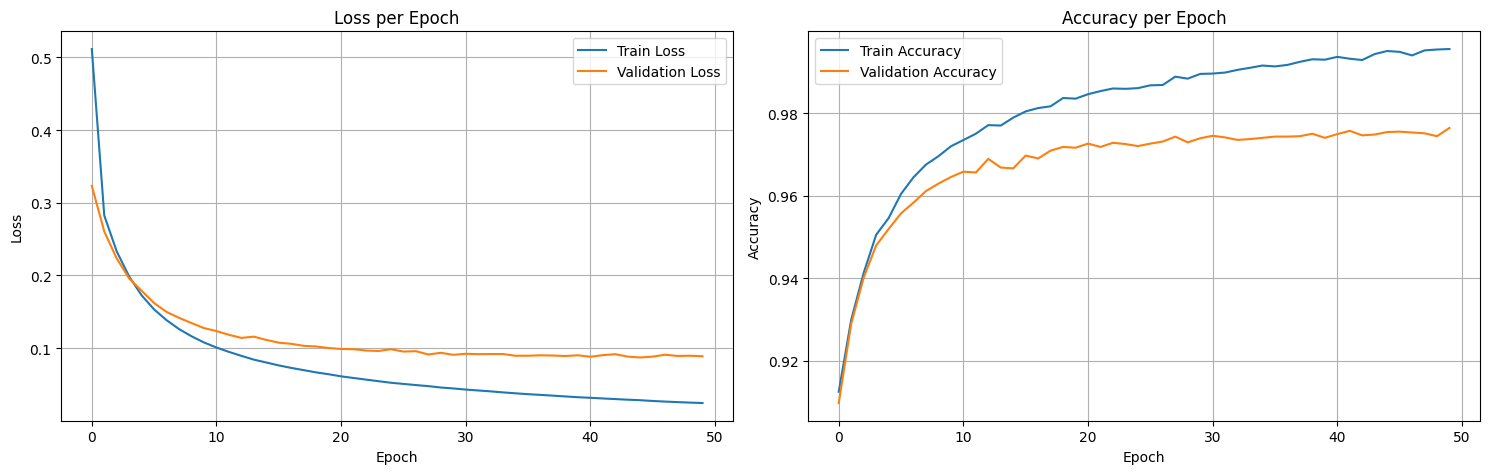

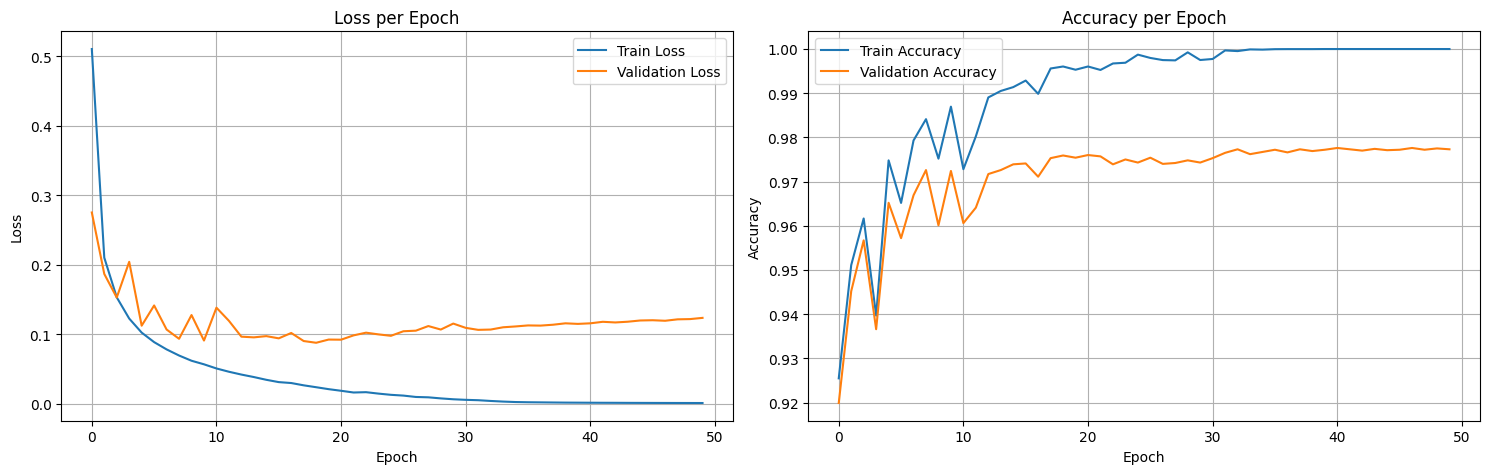

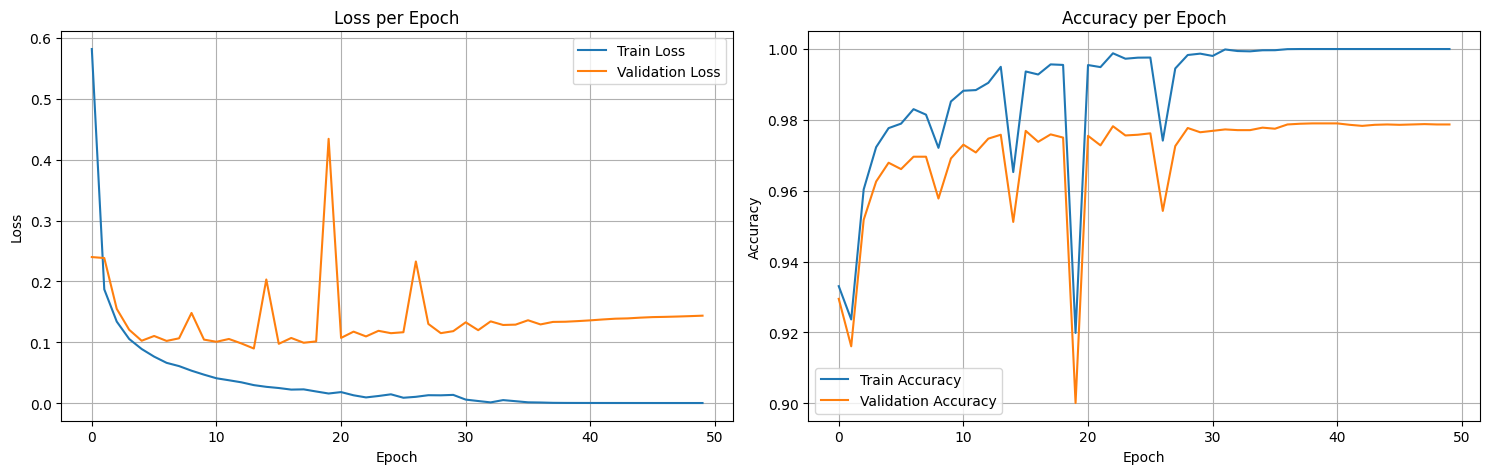

In [47]:
model_test_1_effect_of_depth.plot_training()
model_test_2_effect_of_depth.plot_training()
model_test_3_effect_of_depth.plot_training()

##### Effect of depth - Weight Distribution Comparison

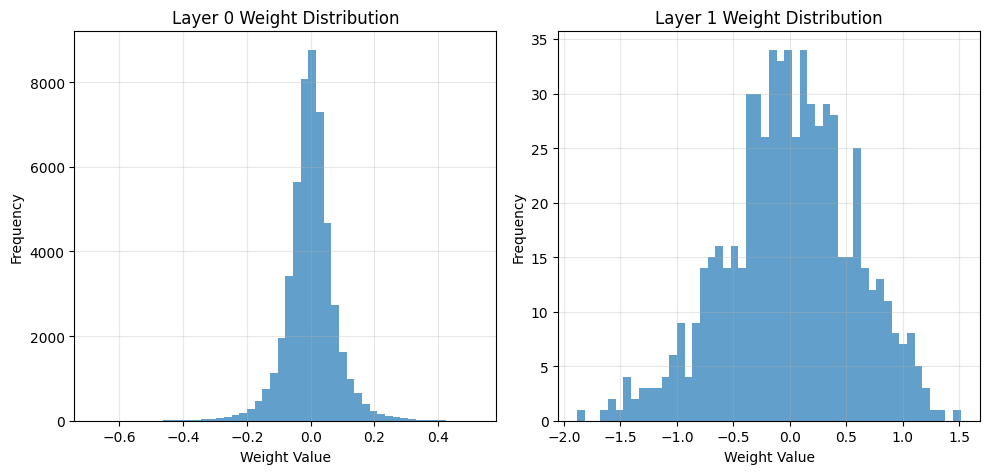

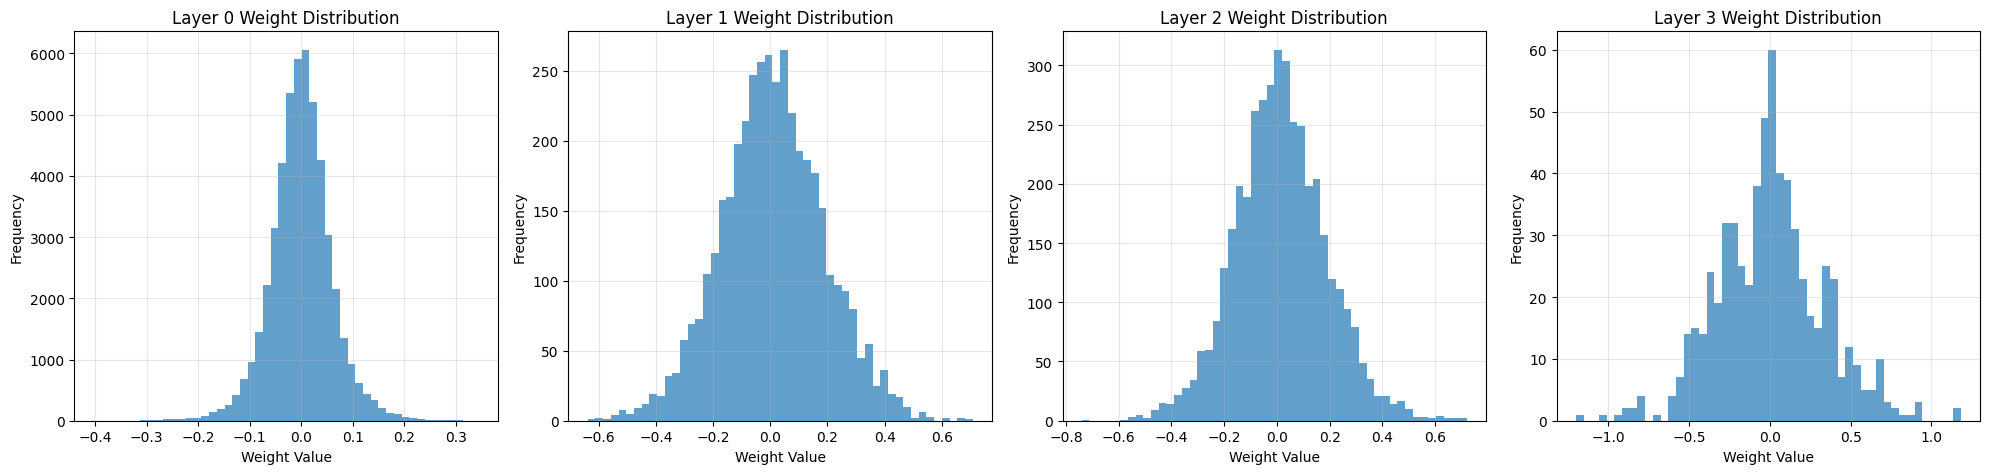

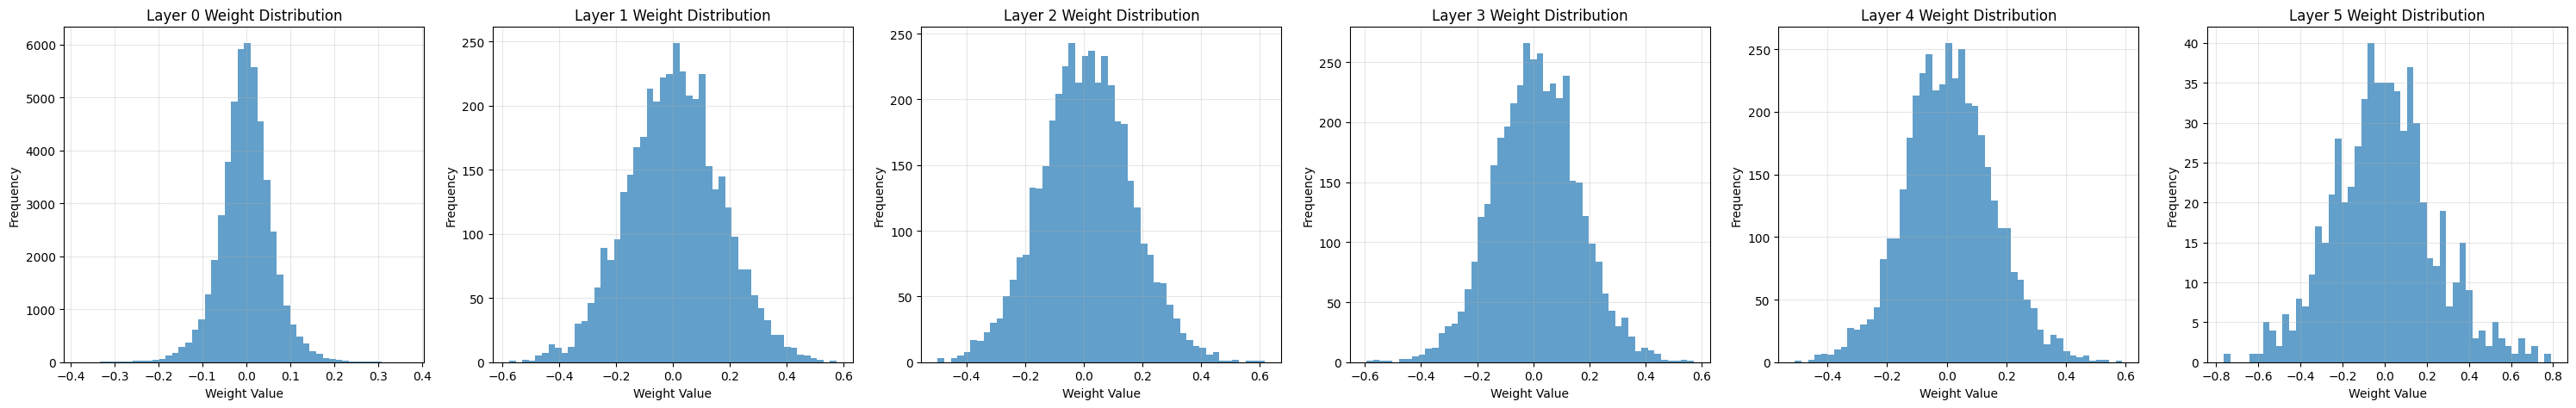

In [48]:
model_test_1_effect_of_depth.plot_weight_distribution()
model_test_2_effect_of_depth.plot_weight_distribution()
model_test_3_effect_of_depth.plot_weight_distribution()

##### Effect of depth - Gradient Distribution Comparison

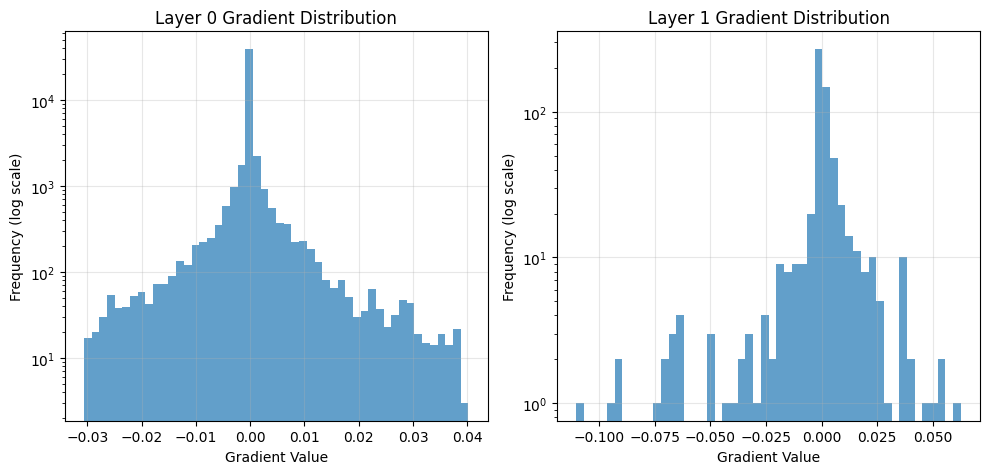

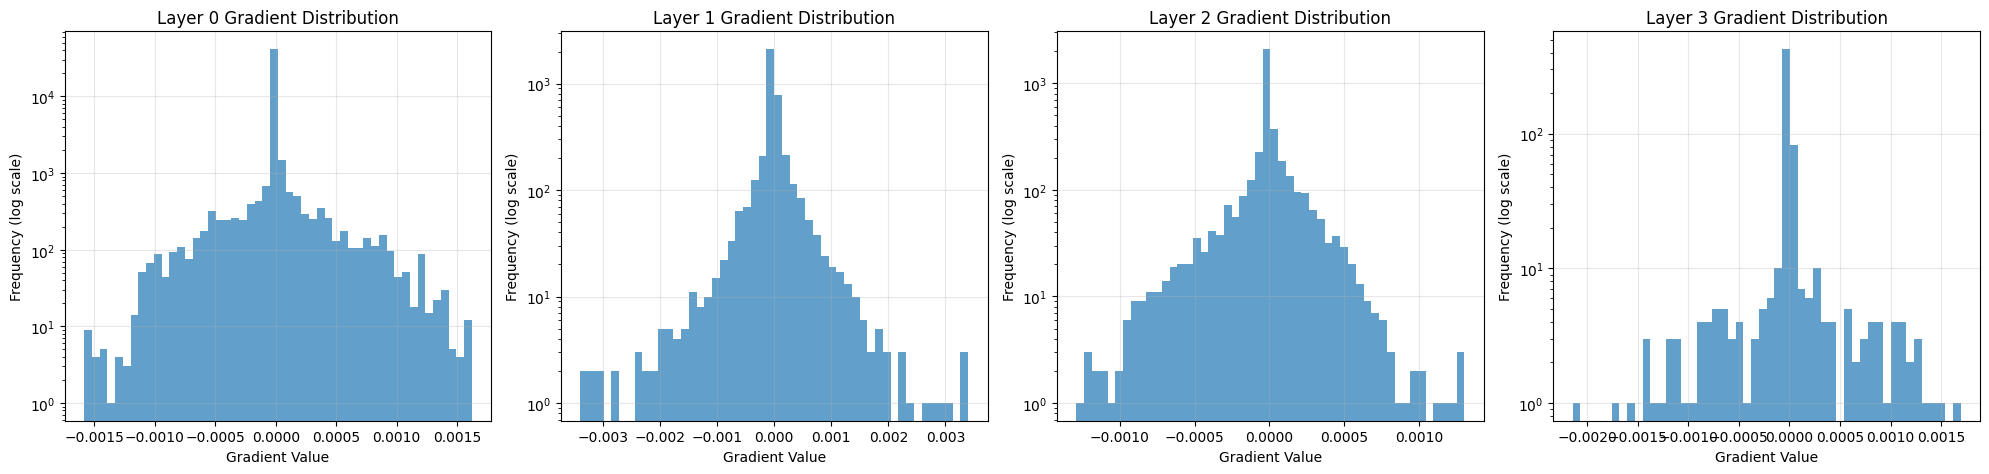

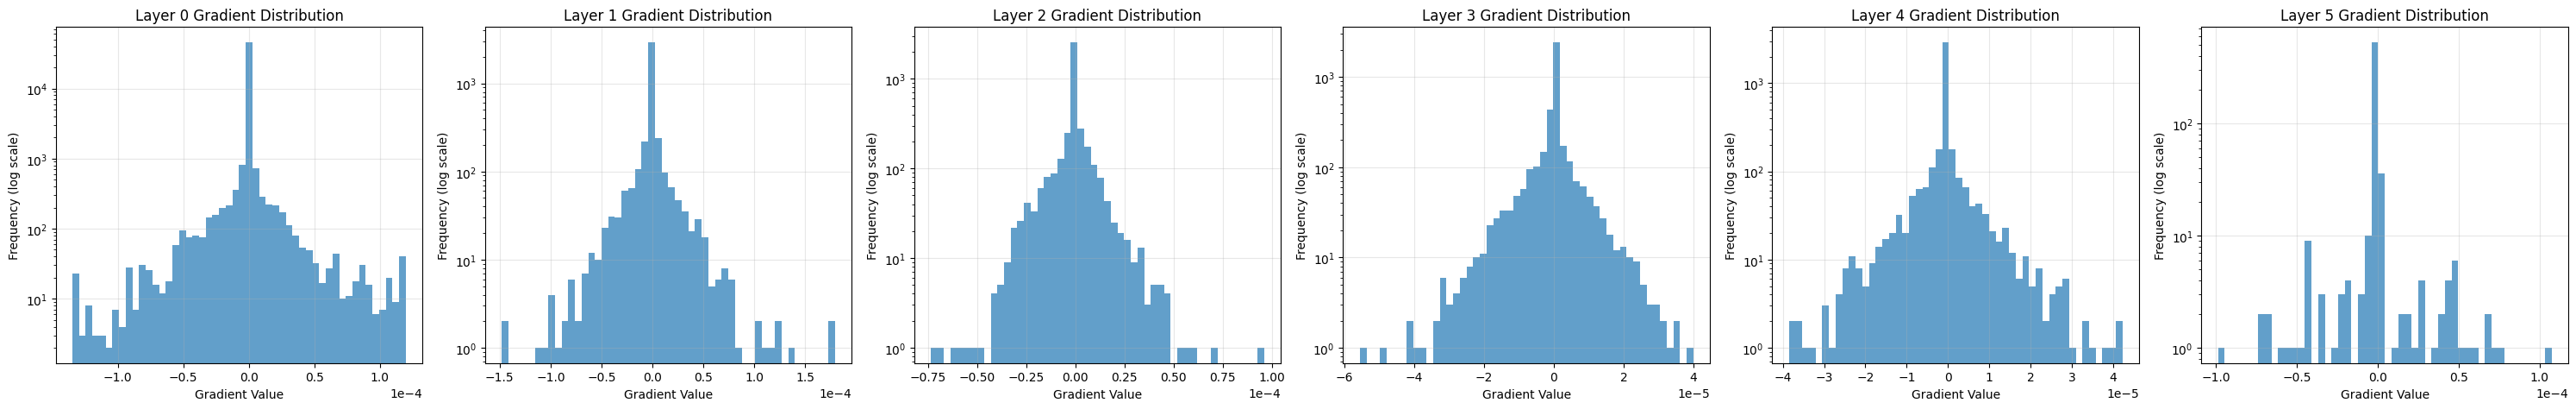

In [49]:
model_test_1_effect_of_depth.plot_gradient_distribution()
model_test_2_effect_of_depth.plot_gradient_distribution()
model_test_3_effect_of_depth.plot_gradient_distribution()

##### Conclusion - Affect of Depth (number of layers)

Based on our experiments across models with varying depths (number of layers), deeper networks do not always lead to better performance. In fact, deeper networks exhibited more instability in their loss curves, indicating less stable training behavior. The visualizations revealed two key findings:
1. Non-linear performance gains : Adding more layes doesn't necessary mean that models will perform better. The first model, with only one hidden layer, achieved higher accuracy than the second model, which had three hidden layers.
2. Unstable training : Increasing the number of layers led to more dramatic fluctuations in the loss graph. This suggests that deeper networks experienced more unstable training patterns. This observation is proven with the third model that has the most unstable loss and accuracy curves compared to the other two models.

### 2. Effect of activation function

#### Effects of activation functions in hidden layer - Test and parameters :
- 2 hidden layers
- 64 neurons per layer
- Test 1 : Linear
- Test 2 : ReLu
- Test 3 : Sigmoid
- Test 4 : Tanh

##### Test 1 - Linear

In [50]:
model_test_1_effect_of_activation_function = NeuralNetwork('categorical_cross_entropy')
model_test_1_effect_of_activation_function.add_layer(DenseLayer(output_size=64, seed=40, activation=linear, init="Xavier"))
model_test_1_effect_of_activation_function.add_layer(DenseLayer(output_size=64, seed=41, activation=linear, init="Xavier"))
model_test_1_effect_of_activation_function.add_layer(DenseLayer(output_size=10, seed=42, activation=softmax, init="Xavier"))

history_test_1_effect_of_activation_function = model_test_1_effect_of_activation_function.train(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    learning_rate=0.05,
    isOne_hot=True,
    verbose=1,
    validation_data=(X_test, y_test)
)

[=================================================>] 100%
Epoch 1/50 - 2.04s - loss: 0.4349 - accuracy: 0.9096 - val_loss: 0.3416 - val_accuracy: 0.9045
[=================================================>] 100%
Epoch 2/50 - 2.08s - loss: 0.3074 - accuracy: 0.9181 - val_loss: 0.3000 - val_accuracy: 0.9155
[=================================================>] 100%
Epoch 3/50 - 2.07s - loss: 0.2927 - accuracy: 0.9203 - val_loss: 0.2945 - val_accuracy: 0.9155
[=================================================>] 100%
Epoch 4/50 - 2.08s - loss: 0.2857 - accuracy: 0.9210 - val_loss: 0.3013 - val_accuracy: 0.9157
[=================================================>] 100%
Epoch 5/50 - 2.05s - loss: 0.2799 - accuracy: 0.9210 - val_loss: 0.2990 - val_accuracy: 0.9110
[=================================================>] 100%
Epoch 6/50 - 2.29s - loss: 0.2760 - accuracy: 0.9225 - val_loss: 0.2973 - val_accuracy: 0.9137
[=================================================>] 100%
Epoch 7/50 - 2.23s - los

In [51]:
predictions_test_1_effect_of_activation_function = model_test_1_effect_of_activation_function.predict(X_test)
pred_classes_test_1_effect_of_activation_function = np.argmax(predictions_test_1_effect_of_activation_function, axis=1)
accuracy_test_1_effect_of_activation_function = accuracy_score(pred_classes_test_1_effect_of_activation_function, y_test)
print("Test Accuracy:", accuracy_test_1_effect_of_activation_function)

Test Accuracy: 0.9226


##### Test 2 - ReLu

In [23]:
model_test_2_effect_of_activation_function = NeuralNetwork('categorical_cross_entropy')
model_test_2_effect_of_activation_function.add_layer(DenseLayer(output_size=64, seed=40, activation=relu, init="Xavier"))
model_test_2_effect_of_activation_function.add_layer(DenseLayer(output_size=64, seed=41, activation=relu, init="Xavier"))
model_test_2_effect_of_activation_function.add_layer(DenseLayer(output_size=10, seed=42, activation=softmax, init="Xavier"))

history_test_2_effect_of_activation_function = model_test_2_effect_of_activation_function.train(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    learning_rate=0.05,
    isOne_hot=True,
    verbose=1,
    validation_data=(X_test, y_test)
)

[=================================================>] 100%
Epoch 1/50 - 2.63s - loss: 0.4902 - accuracy: 0.9240 - val_loss: 0.2762 - val_accuracy: 0.9208
[=================================================>] 100%
Epoch 2/50 - 2.60s - loss: 0.2278 - accuracy: 0.9464 - val_loss: 0.2021 - val_accuracy: 0.9426
[=================================================>] 100%
Epoch 3/50 - 2.60s - loss: 0.1754 - accuracy: 0.9553 - val_loss: 0.1706 - val_accuracy: 0.9519
[=================================================>] 100%
Epoch 4/50 - 2.72s - loss: 0.1461 - accuracy: 0.9642 - val_loss: 0.1475 - val_accuracy: 0.9583
[=================================================>] 100%
Epoch 5/50 - 2.62s - loss: 0.1249 - accuracy: 0.9677 - val_loss: 0.1340 - val_accuracy: 0.9608
[=================================================>] 100%
Epoch 6/50 - 2.45s - loss: 0.1087 - accuracy: 0.9708 - val_loss: 0.1268 - val_accuracy: 0.9621
[=================================================>] 100%
Epoch 7/50 - 2.13s - los

In [24]:
predictions_test_2_effect_of_activation_function = model_test_2_effect_of_activation_function.predict(X_test)
pred_classes_test_2_effect_of_activation_function = np.argmax(predictions_test_2_effect_of_activation_function, axis=1)
accuracy_test_2_effect_of_activation_function = accuracy_score(pred_classes_test_2_effect_of_activation_function, y_test)
print("Test Accuracy:", accuracy_test_2_effect_of_activation_function)

Test Accuracy: 0.9757


##### Test 3 - Sigmoid

In [25]:
model_test_3_effect_of_activation_function = NeuralNetwork('categorical_cross_entropy')
model_test_3_effect_of_activation_function.add_layer(DenseLayer(output_size=64, seed=40, activation=sigmoid, init="Xavier"))
model_test_3_effect_of_activation_function.add_layer(DenseLayer(output_size=64, seed=41, activation=sigmoid, init="Xavier"))
model_test_3_effect_of_activation_function.add_layer(DenseLayer(output_size=10, seed=42, activation=softmax, init="Xavier"))

history_test_3_effect_of_activation_function = model_test_3_effect_of_activation_function.train(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    learning_rate=0.05,
    isOne_hot=True,
    verbose=1,
    validation_data=(X_test, y_test)
)

[=================================================>] 100%
Epoch 1/50 - 2.87s - loss: 2.0020 - accuracy: 0.6514 - val_loss: 1.4195 - val_accuracy: 0.6517
[=================================================>] 100%
Epoch 2/50 - 2.81s - loss: 0.9994 - accuracy: 0.8179 - val_loss: 0.7268 - val_accuracy: 0.8156
[=================================================>] 100%
Epoch 3/50 - 2.86s - loss: 0.5927 - accuracy: 0.8687 - val_loss: 0.5059 - val_accuracy: 0.8633
[=================================================>] 100%
Epoch 4/50 - 3.04s - loss: 0.4483 - accuracy: 0.8915 - val_loss: 0.4147 - val_accuracy: 0.8853
[=================================================>] 100%
Epoch 5/50 - 2.85s - loss: 0.3827 - accuracy: 0.8999 - val_loss: 0.3681 - val_accuracy: 0.8960
[=================================================>] 100%
Epoch 6/50 - 2.58s - loss: 0.3460 - accuracy: 0.9076 - val_loss: 0.3383 - val_accuracy: 0.9031
[=================================================>] 100%
Epoch 7/50 - 2.49s - los

In [26]:
predictions_test_3_effect_of_activation_function = model_test_3_effect_of_activation_function.predict(X_test)
pred_classes_test_3_effect_of_activation_function = np.argmax(predictions_test_3_effect_of_activation_function, axis=1)
accuracy_test_3_effect_of_activation_function = accuracy_score(pred_classes_test_3_effect_of_activation_function, y_test)
print("Test Accuracy:", accuracy_test_3_effect_of_activation_function)

Test Accuracy: 0.9668


##### Test 4 - Tanh

In [27]:
model_test_4_effect_of_activation_function = NeuralNetwork('categorical_cross_entropy')
model_test_4_effect_of_activation_function.add_layer(DenseLayer(output_size=64, seed=40, activation=tanh, init="Xavier"))
model_test_4_effect_of_activation_function.add_layer(DenseLayer(output_size=64, seed=41, activation=tanh, init="Xavier"))
model_test_4_effect_of_activation_function.add_layer(DenseLayer(output_size=10, seed=42, activation=softmax, init="Xavier"))

history_test_4_effect_of_activation_function = model_test_4_effect_of_activation_function.train(
    X_train,
    y_train,
    epochs=50,
    batch_size=64,
    learning_rate=0.05,
    isOne_hot=True,
    verbose=1,
    validation_data=(X_test, y_test)
)

[=================================================>] 100%
Epoch 1/50 - 2.26s - loss: 0.4737 - accuracy: 0.9192 - val_loss: 0.2979 - val_accuracy: 0.9158
[=================================================>] 100%
Epoch 2/50 - 3.04s - loss: 0.2538 - accuracy: 0.9369 - val_loss: 0.2322 - val_accuracy: 0.9330
[=================================================>] 100%
Epoch 3/50 - 2.44s - loss: 0.2028 - accuracy: 0.9489 - val_loss: 0.1945 - val_accuracy: 0.9436
[=================================================>] 100%
Epoch 4/50 - 2.60s - loss: 0.1690 - accuracy: 0.9569 - val_loss: 0.1714 - val_accuracy: 0.9501
[=================================================>] 100%
Epoch 5/50 - 2.61s - loss: 0.1452 - accuracy: 0.9621 - val_loss: 0.1528 - val_accuracy: 0.9557
[=================================================>] 100%
Epoch 6/50 - 4.02s - loss: 0.1271 - accuracy: 0.9666 - val_loss: 0.1403 - val_accuracy: 0.9578
[=================================================>] 100%
Epoch 7/50 - 2.13s - los

In [28]:
predictions_test_4_effect_of_activation_function = model_test_4_effect_of_activation_function.predict(X_test)
pred_classes_test_4_effect_of_activation_function = np.argmax(predictions_test_4_effect_of_activation_function, axis=1)
accuracy_test_4_effect_of_activation_function = accuracy_score(pred_classes_test_4_effect_of_activation_function, y_test)
print("Test Accuracy:", accuracy_test_4_effect_of_activation_function)

Test Accuracy: 0.9771


##### Effect of activation function - Training Comparison

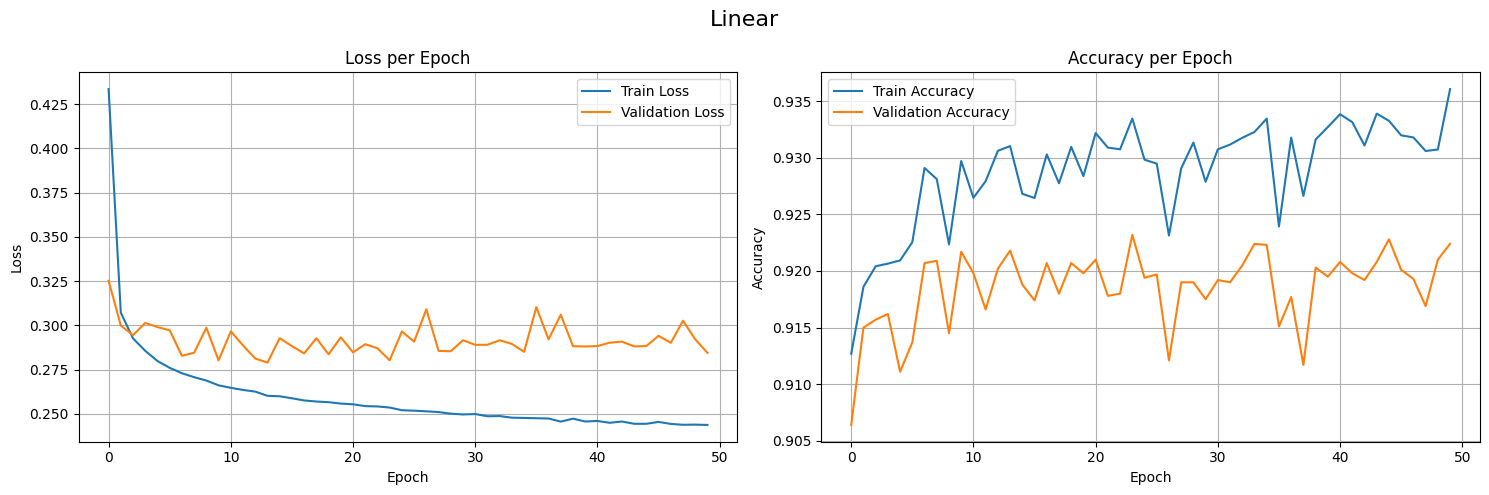

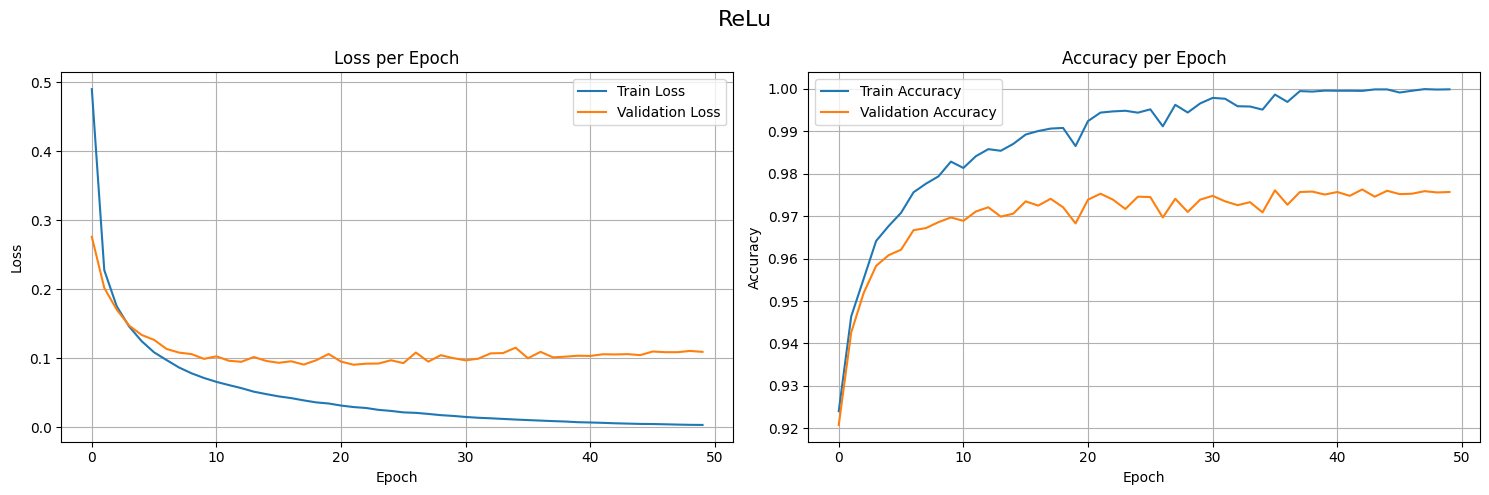

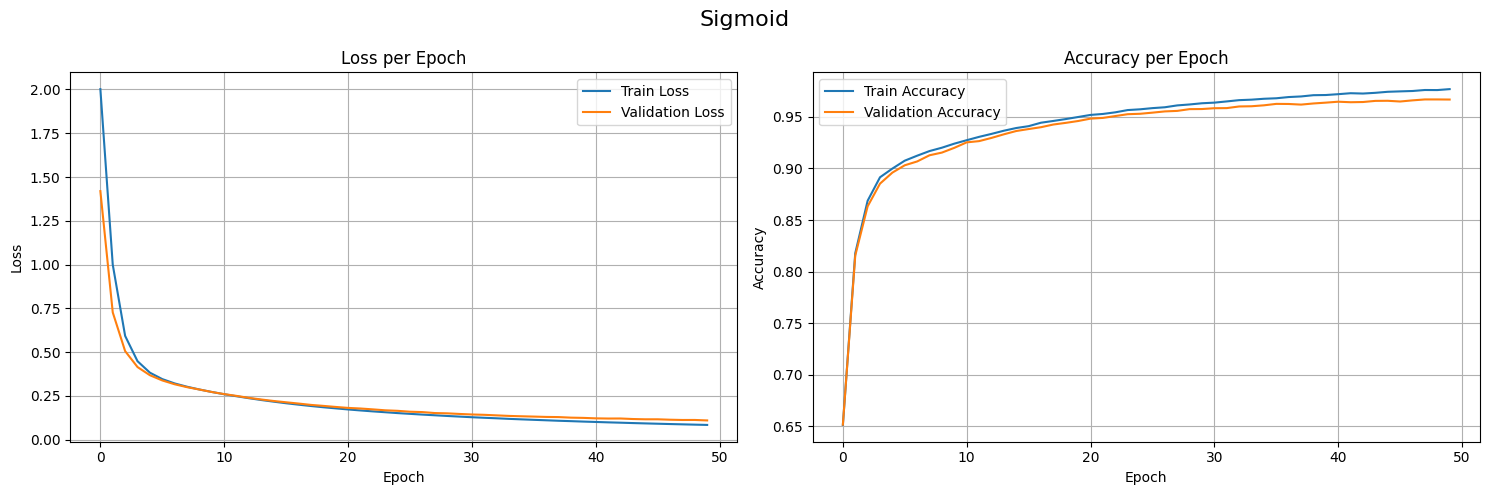

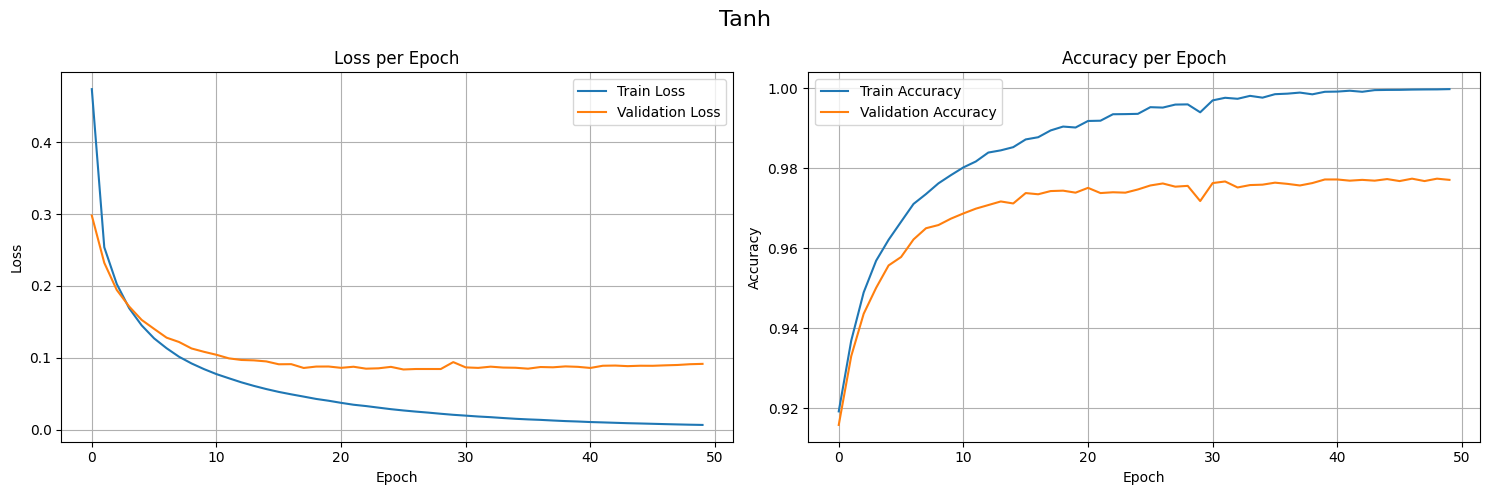

In [29]:
model_test_1_effect_of_activation_function.plot_training(title='Linear')
model_test_2_effect_of_activation_function.plot_training(title='ReLu')
model_test_3_effect_of_activation_function.plot_training(title='Sigmoid')
model_test_4_effect_of_activation_function.plot_training(title='Tanh')

##### Effect of activation function - Weight Distribution Comparison

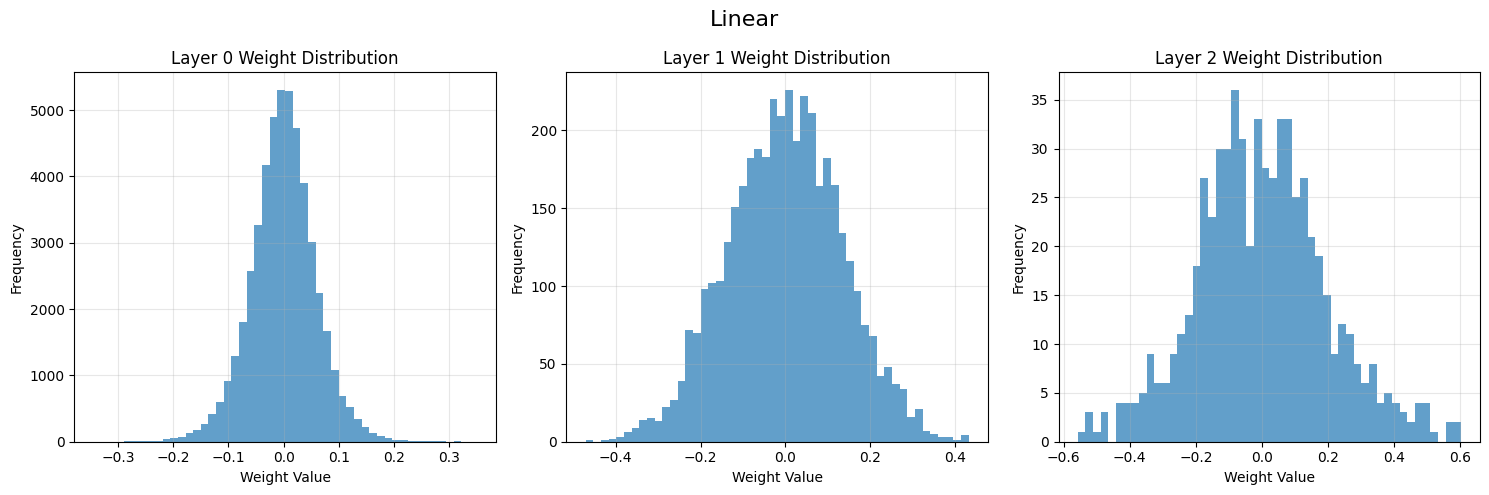

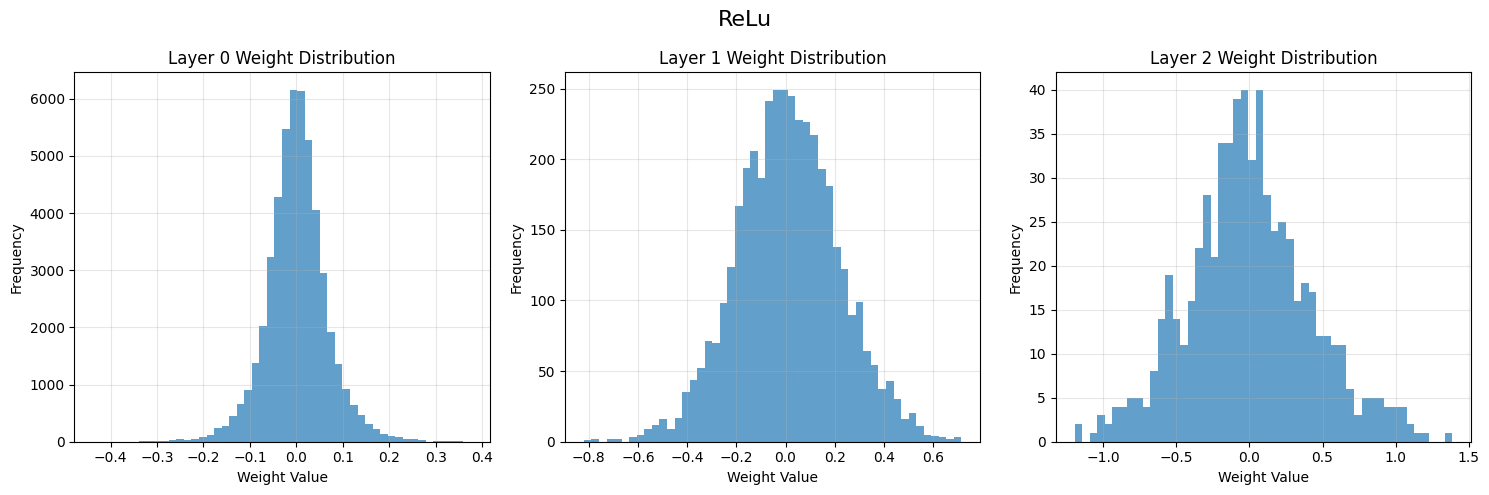

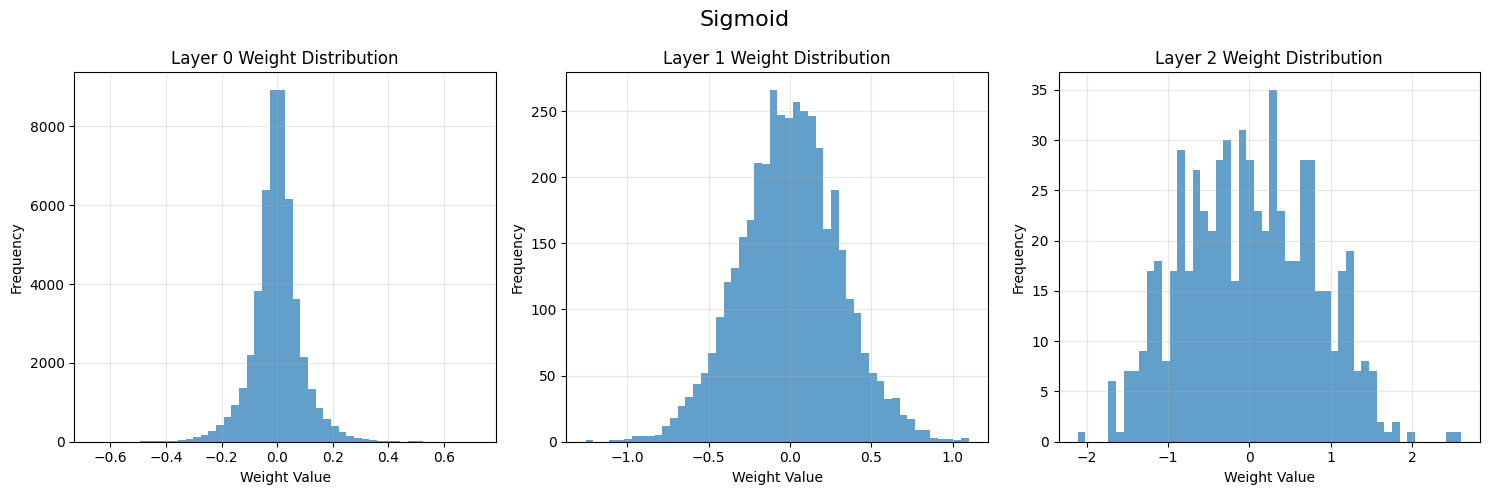

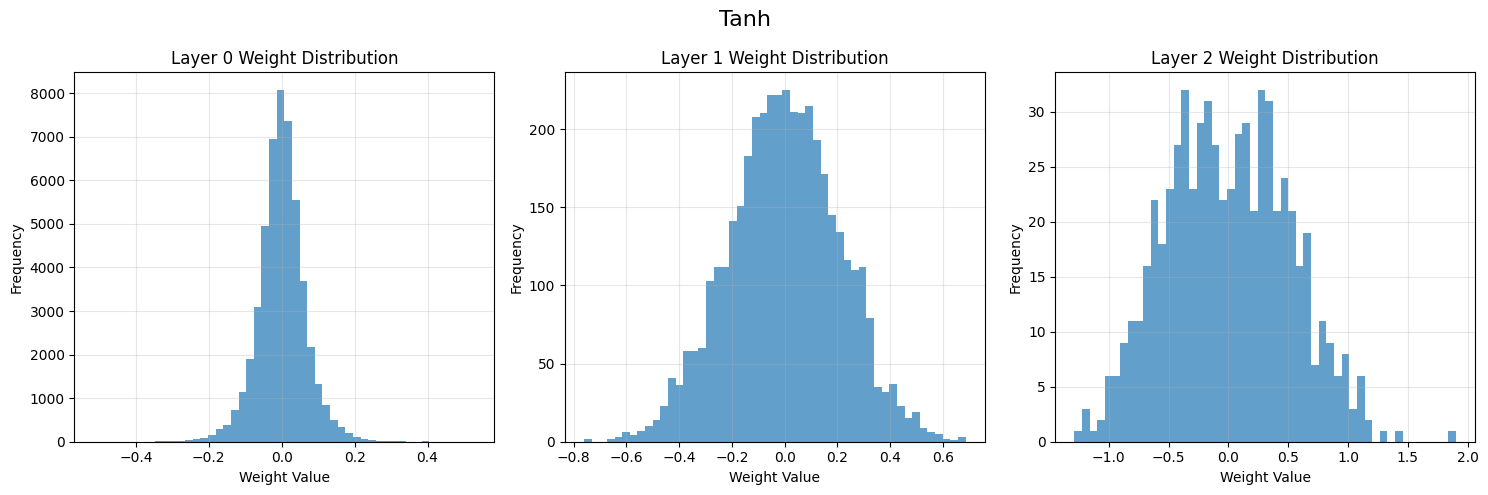

In [30]:
model_test_1_effect_of_activation_function.plot_weight_distribution(title='Linear')
model_test_2_effect_of_activation_function.plot_weight_distribution(title='ReLu')
model_test_3_effect_of_activation_function.plot_weight_distribution(title='Sigmoid')
model_test_4_effect_of_activation_function.plot_weight_distribution(title='Tanh')

##### Effect of activation function - Gradient Distribution Comparison

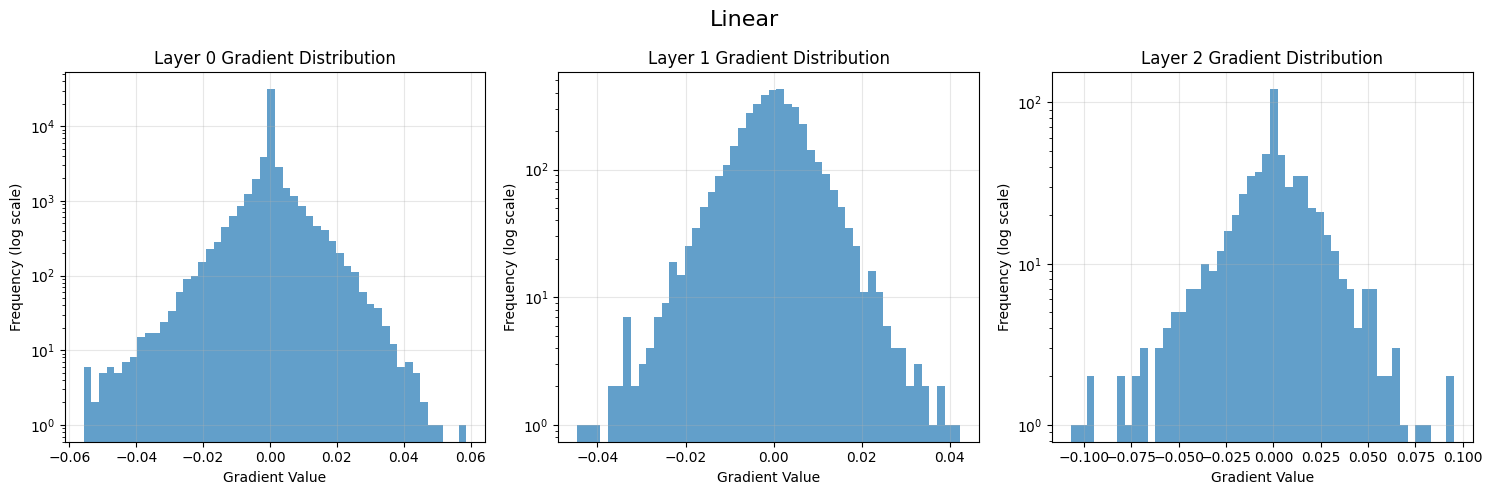

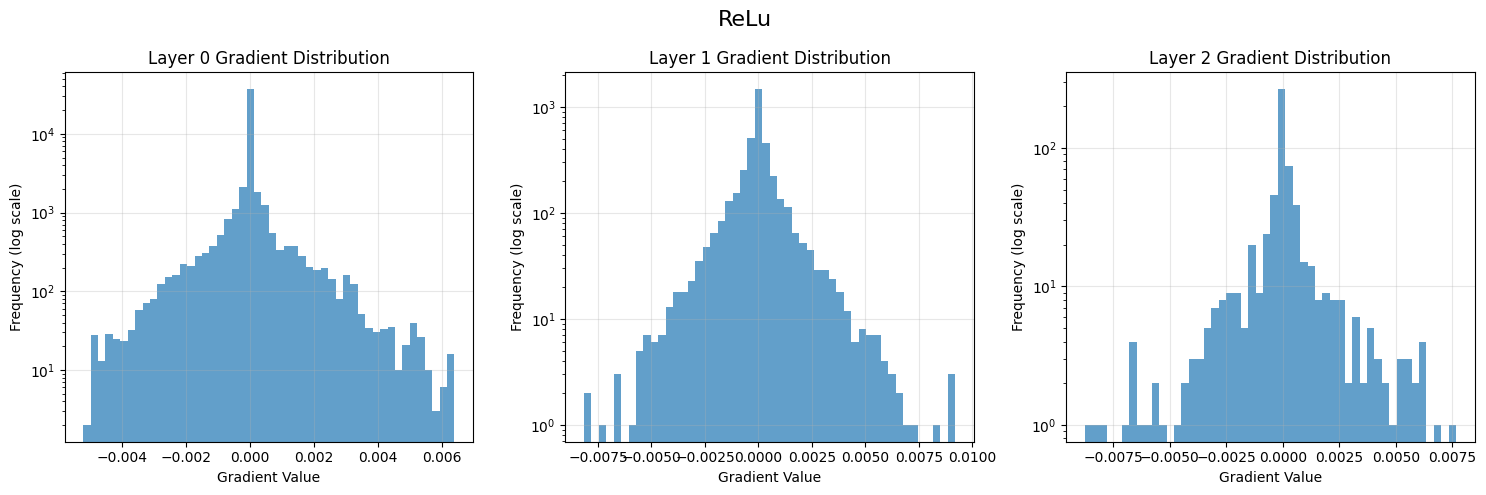

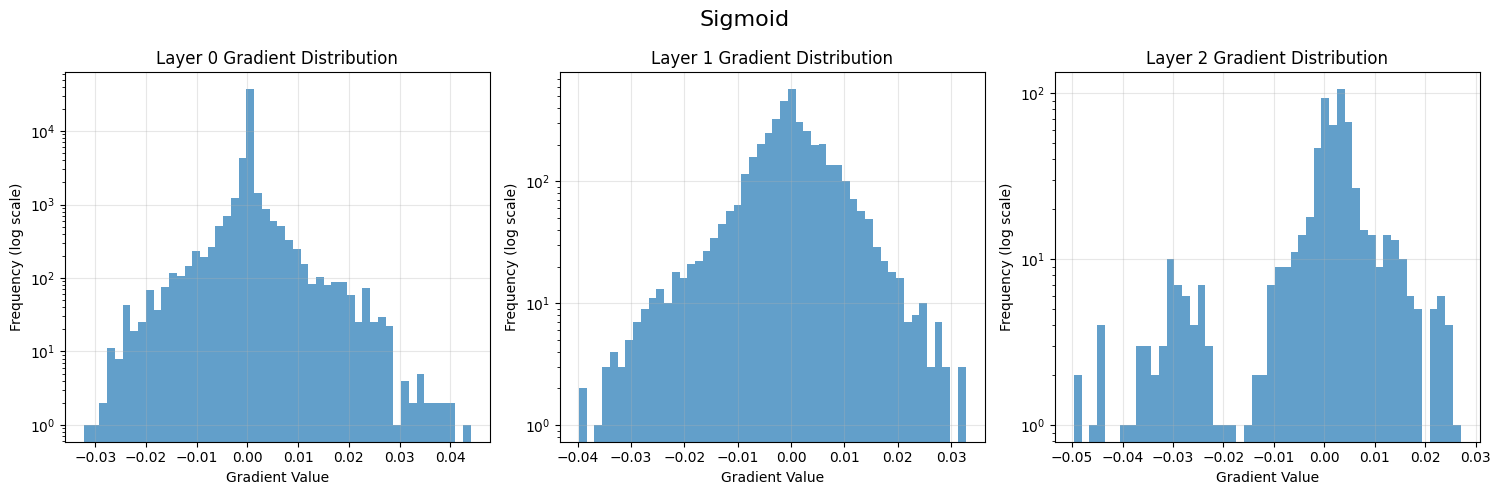

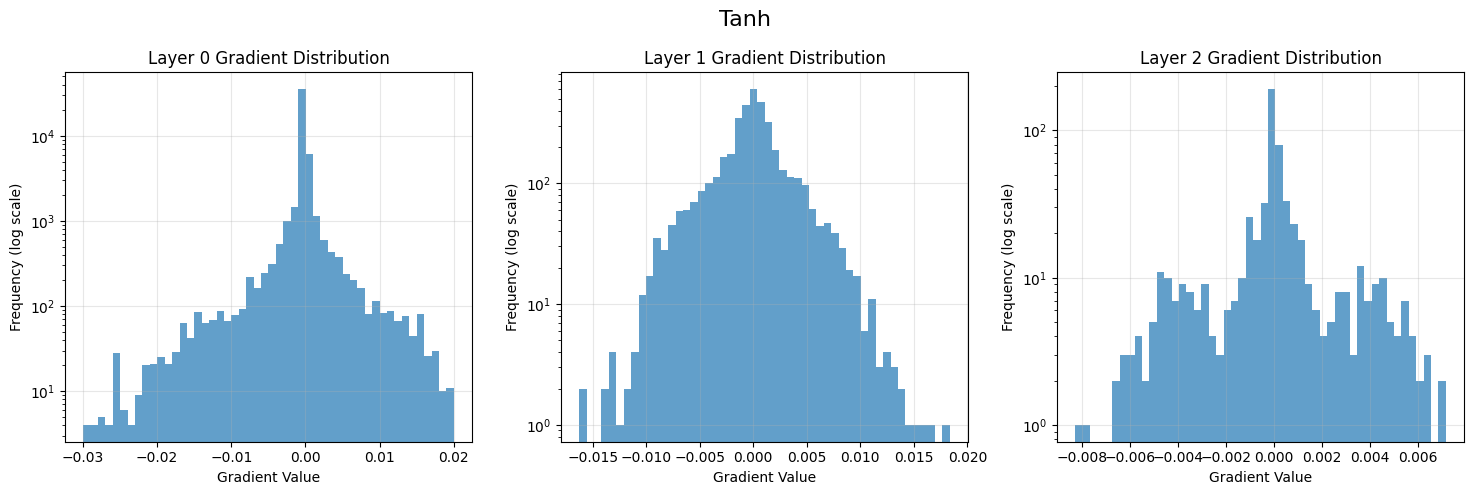

In [31]:
model_test_1_effect_of_activation_function.plot_gradient_distribution(title='Linear')
model_test_2_effect_of_activation_function.plot_gradient_distribution(title='ReLu')
model_test_3_effect_of_activation_function.plot_gradient_distribution(title='Sigmoid')
model_test_4_effect_of_activation_function.plot_gradient_distribution(title='Tanh')

##### Conclusion - Effect of activation function

### 3. Effect of learning rate

## Compare model with sklearn MLP

In [16]:
mlp = MLPClassifier(hidden_layer_sizes=(128, 64),activation='relu', 
                    solver='adam', max_iter=20, random_state=1, verbose=True)

mlp.fit(X_train, y_train)

Iteration 1, loss = 0.37724840
Iteration 2, loss = 0.15004672
Iteration 3, loss = 0.10562821
Iteration 4, loss = 0.08064147
Iteration 5, loss = 0.06428497
Iteration 6, loss = 0.05121985
Iteration 7, loss = 0.04219482
Iteration 8, loss = 0.03723277
Iteration 9, loss = 0.02986735
Iteration 10, loss = 0.02325205
Iteration 11, loss = 0.02124234
Iteration 12, loss = 0.01549812
Iteration 13, loss = 0.01433403
Iteration 14, loss = 0.01377085
Iteration 15, loss = 0.00927998
Iteration 16, loss = 0.00973711
Iteration 17, loss = 0.01097088
Iteration 18, loss = 0.00895768
Iteration 19, loss = 0.00620646
Iteration 20, loss = 0.00376964


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=20, random_state=1,
              verbose=True)

In [17]:
y_pred_mlp = mlp.predict(X_test)
acc_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"MLPClassifier Test Accuracy: {acc_mlp:.4f}")

MLPClassifier Test Accuracy: 0.9790


In [18]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       986
           1       0.99      0.99      0.99      1125
           2       0.97      0.98      0.98       999
           3       0.99      0.95      0.97      1020
           4       0.98      0.98      0.98       975
           5       0.96      0.98      0.97       902
           6       0.99      0.99      0.99       982
           7       0.98      0.98      0.98      1042
           8       0.98      0.97      0.97       975
           9       0.95      0.99      0.97       994

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

